# Credit Card Fraud Detection

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# metrix
from sklearn.metrics import (
                             accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             f1_score, 
                             roc_auc_score, 
                             roc_curve, 
                             RocCurveDisplay
                            )
# ANNs
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout, Dense, Flatten, Conv1D

# 2. Import Dataset

In [2]:
credit_df = pd.read_csv('data/creditcard.csv')

# 3. Exploratory Data Analysis (EDA)

## 3.1 Review the Dataset

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_df.shape

(284807, 31)

In [5]:
credit_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# pd.set_option('display.float', '{:.2f}'.format)
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
credit_df.Class.unique() # 1 for fraudulent transactions, 0 otherwise

array([0, 1], dtype=int64)

In [10]:
credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
print(f'No Frauds: {(credit_df.Class.value_counts()[0] / len(credit_df)).round(4) * 100} % of the dataset')
print(f'Frauds: {(credit_df.Class.value_counts()[1] / len(credit_df)).round(5) * 100} % of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.173 % of the dataset


## 3.2 Plot Distribution of the Dataset

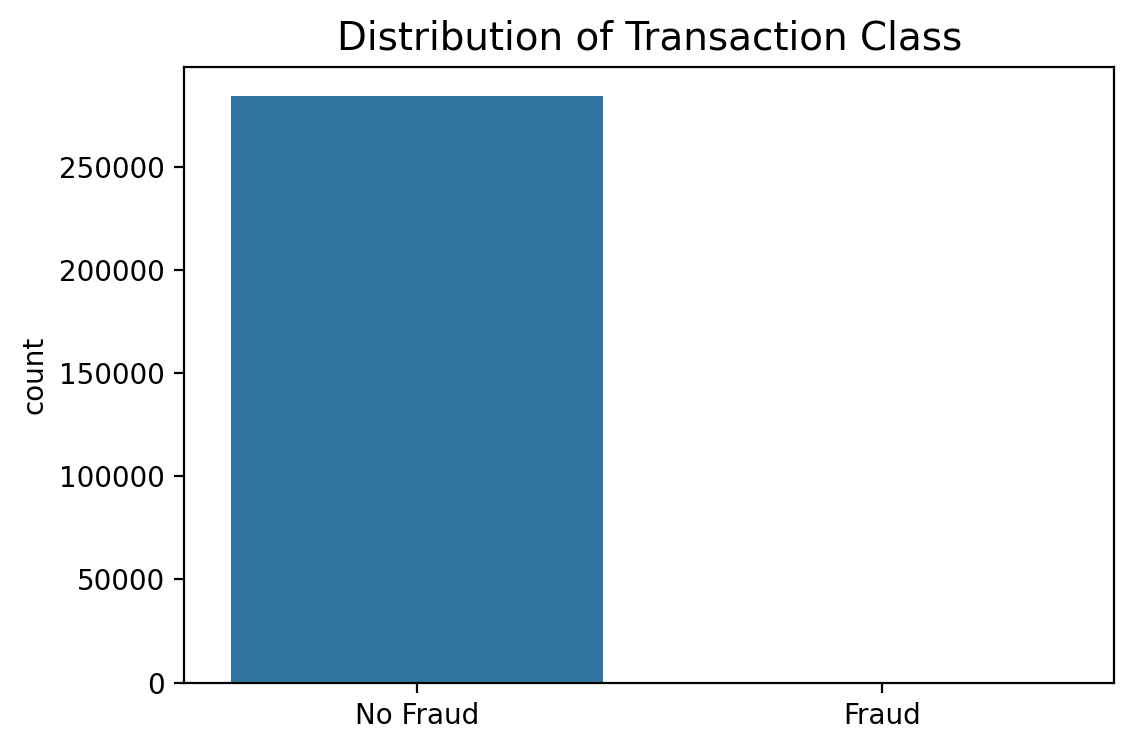

In [12]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = 'Class', data = credit_df) 
ax.set_title('Distribution of Transaction Class', fontsize = 14) 
ax.set_xticklabels(labels = ['No Fraud', 'Fraud'])
ax.set_xlabel('') ;

In [13]:
credit_df.Amount.values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

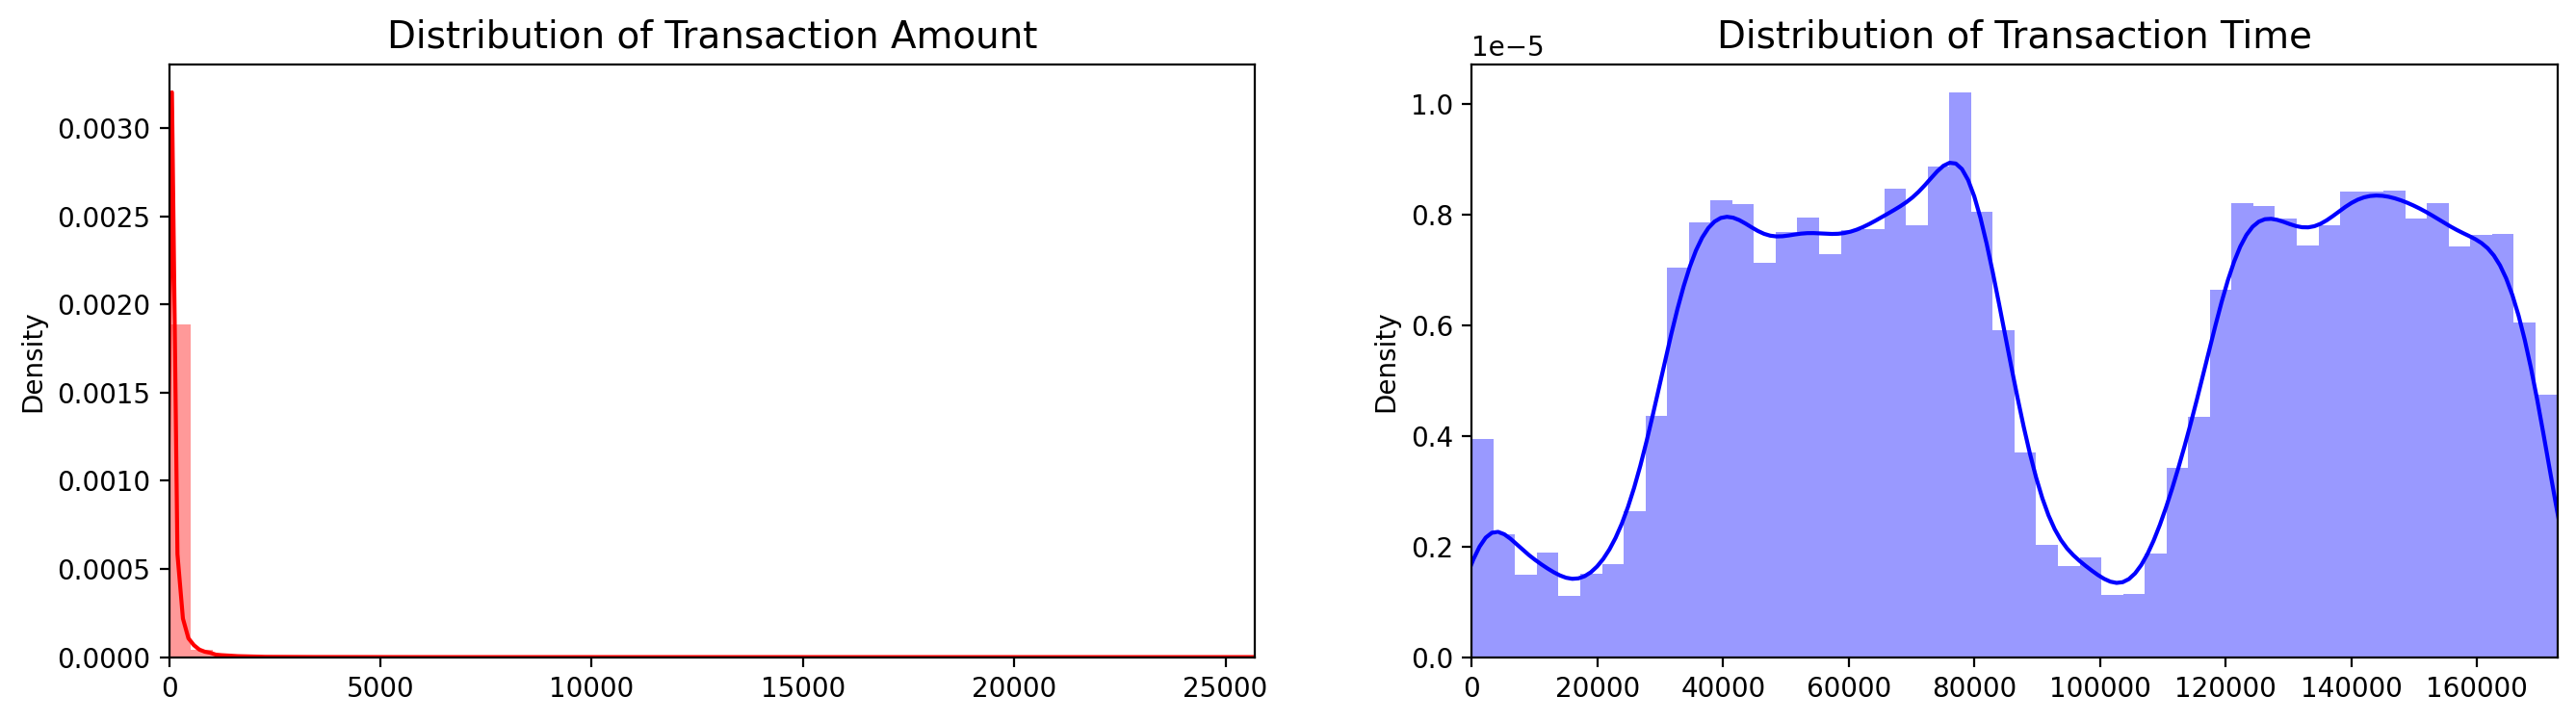

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 4))

amount_val = credit_df.Amount.values
time_val = credit_df.Time.values

sns.distplot(amount_val, ax = ax[0], color = 'red')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax = ax[1], color = 'blue')
ax[1].set_title('Distribution of Transaction Time', fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show() ;

## 3.3 Plot Correlation of the Dataset

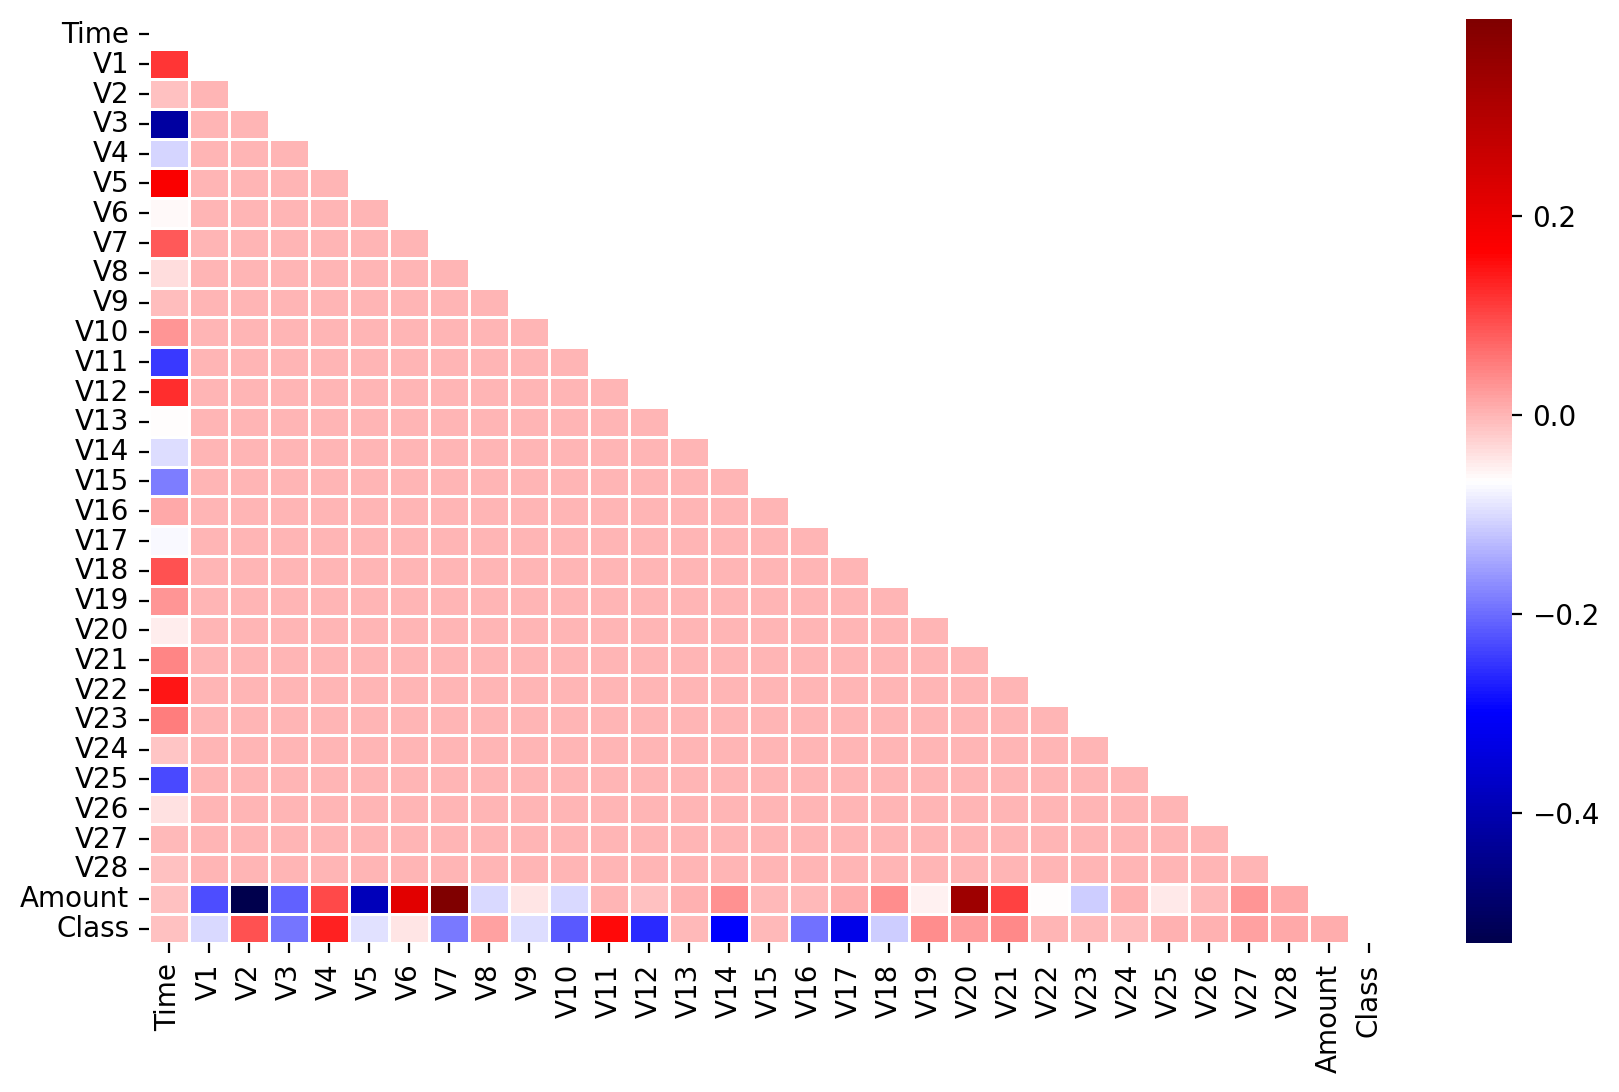

In [15]:
mask = np.zeros_like(credit_df.corr())
mask[np.triu_indices_from(mask)] = True # upper

plt.figure(figsize = (10,6))
sns.heatmap(data = credit_df.corr(),
            cmap = 'seismic', 
            mask = mask,
            linewidths = 0.5) ; 

In [16]:
# credit_df.corr().style.background_gradient(cmap = 'Reds').format('{:.2f}')

# 4. Data Pre-processing

## 4.1 preprocessing.StandardScaler (z-score)

### 4.1.1 histogram: raw score

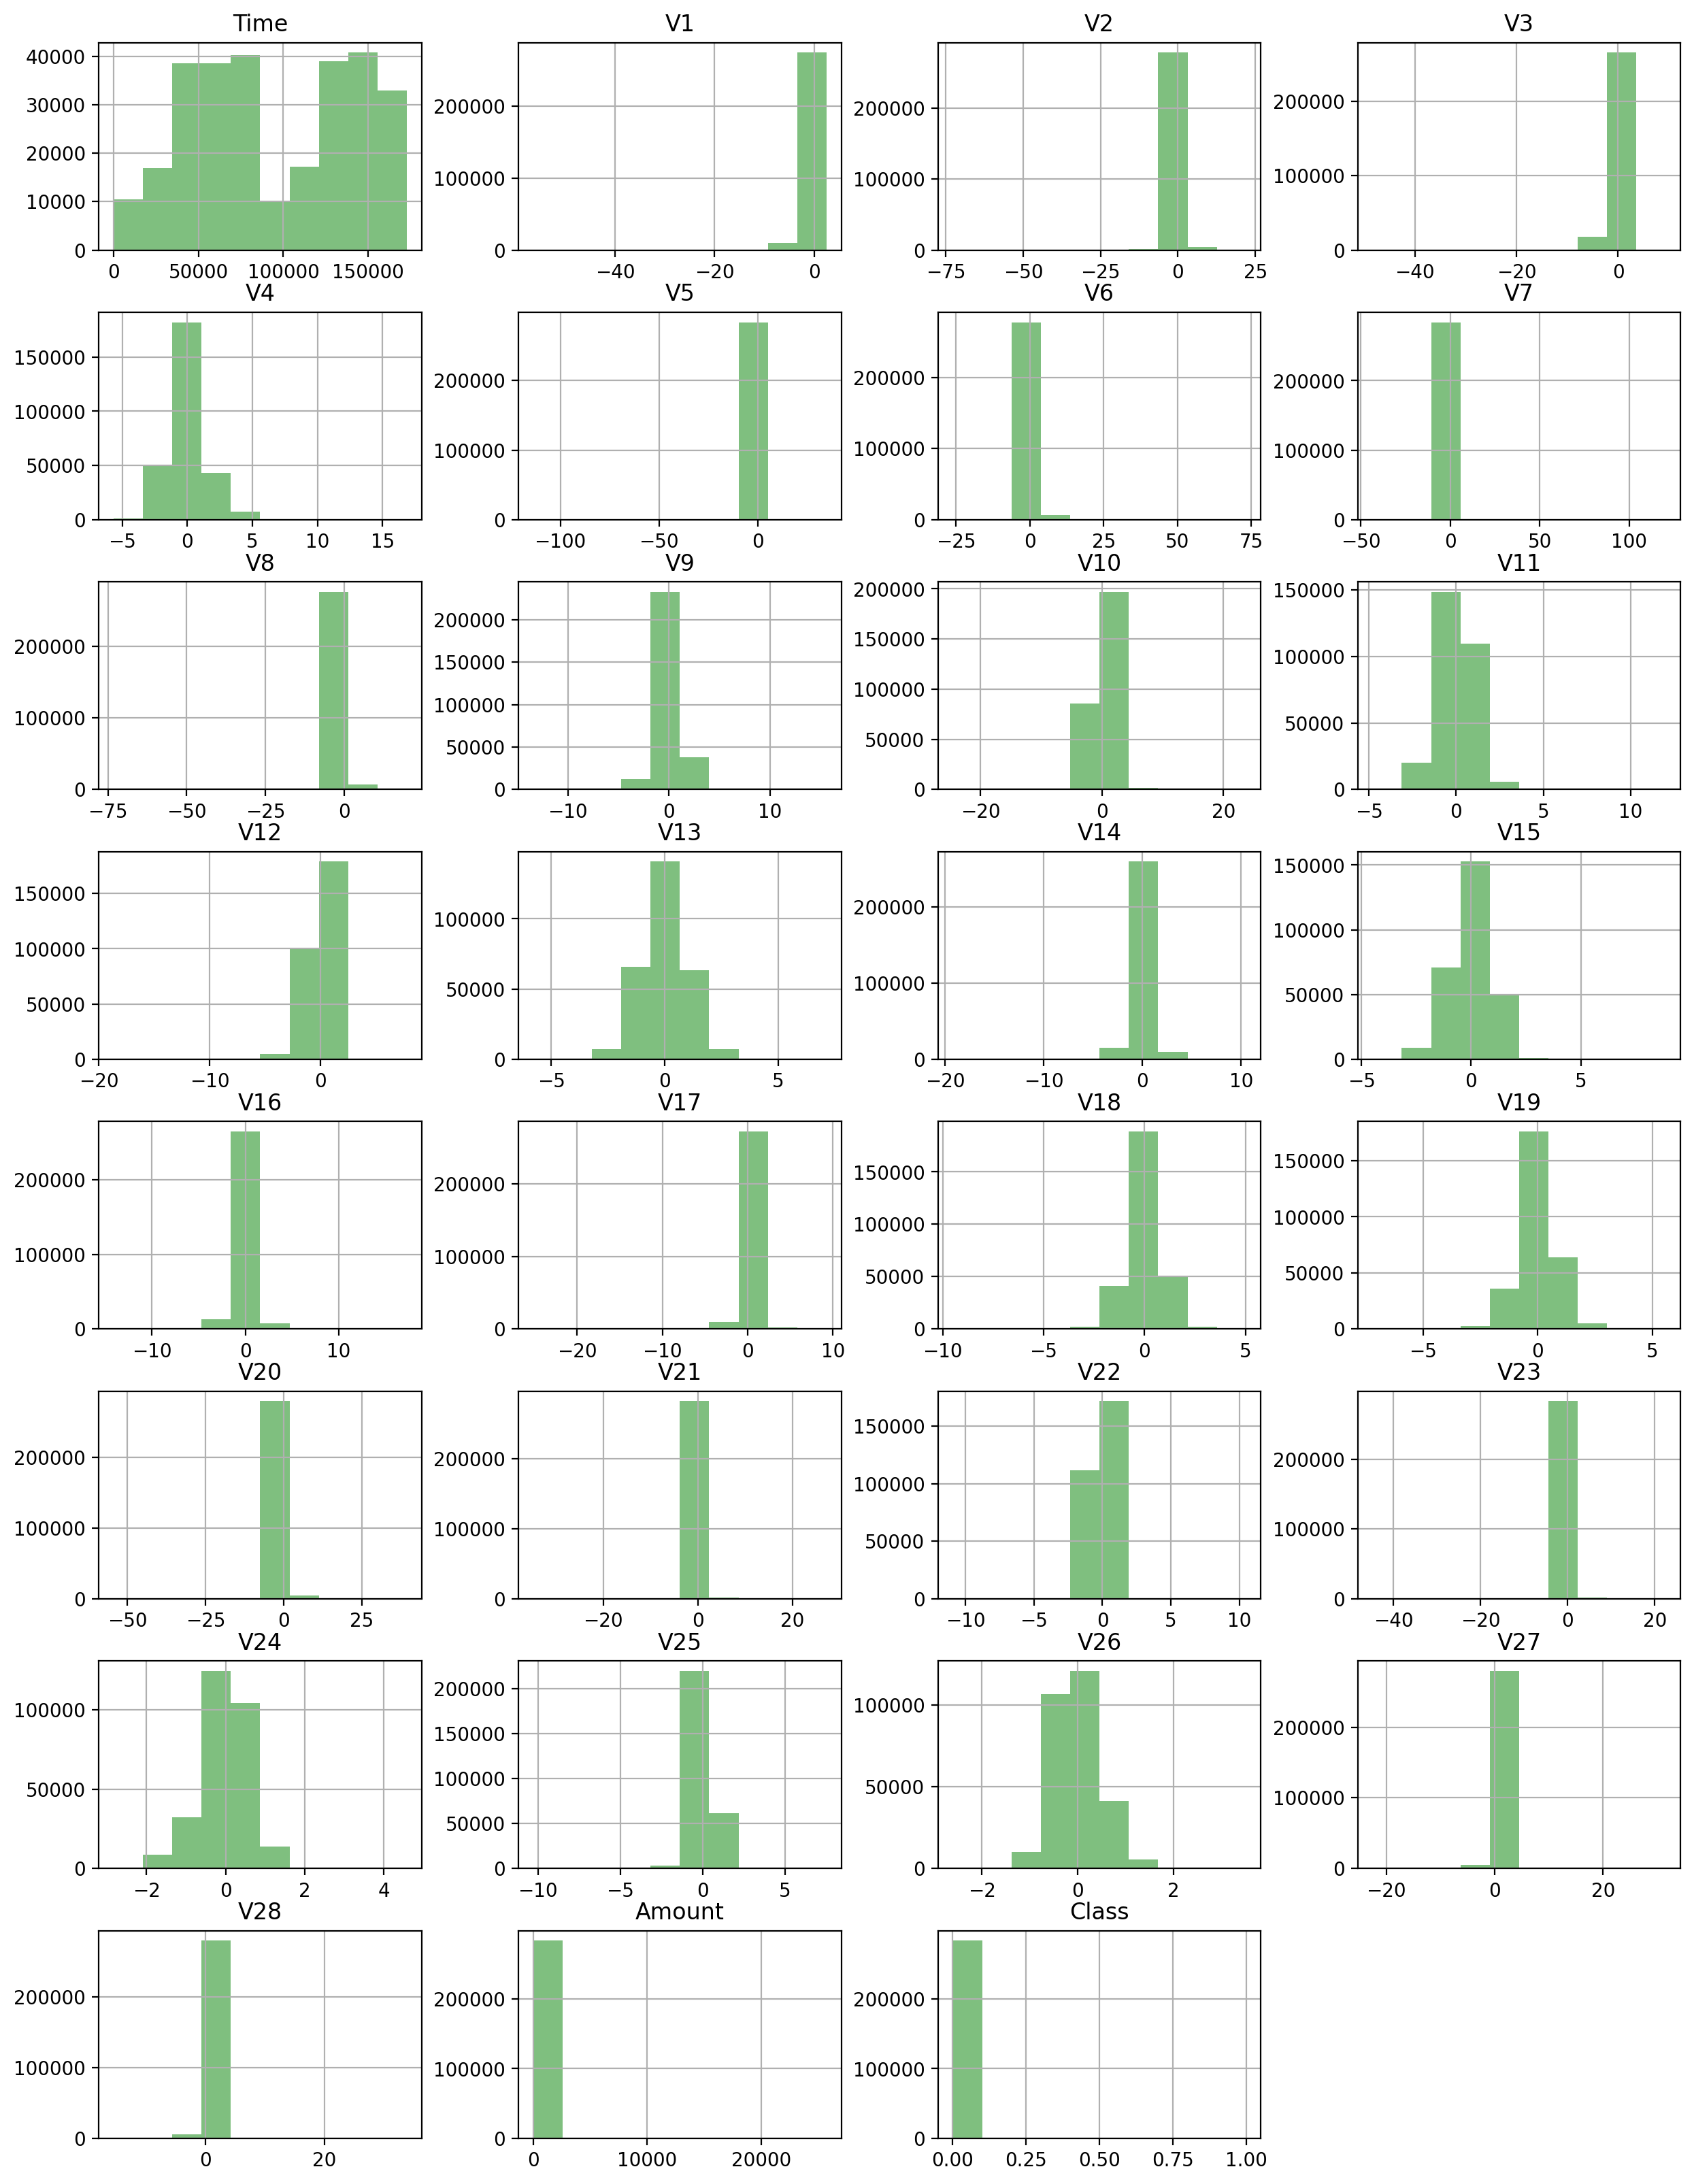

In [17]:
credit_df.hist(layout = (8, 4),
               figsize = (15, 20),
               color = 'green', 
               alpha = 0.5) ;

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))

array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [20]:
credit_df['scaled_amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))
credit_df['scaled_time'] = scaler.fit_transform(credit_df['Time'].values.reshape(-1, 1))

In [21]:
print(f'mean = {credit_df.scaled_amount.mean()}')
print(f'std = {credit_df.scaled_amount.std()}')

mean = 3.202236423019539e-16
std = 1.0000017555792826


In [22]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [23]:
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'scaled_amount', 'scaled_time'],
      dtype='object')

In [24]:
scaled_amount = credit_df['scaled_amount']
scaled_time = credit_df['scaled_time']

credit_df.drop(['Time', 'Amount', 'scaled_amount', 'scaled_time'], axis = 'columns', inplace = True)

credit_df.insert(loc = 0, column = 'scaled_amount', value = scaled_amount)
credit_df.insert(loc = 1, column = 'scaled_time', value = scaled_time)

credit_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### 4.1.2 histogram: z-score score

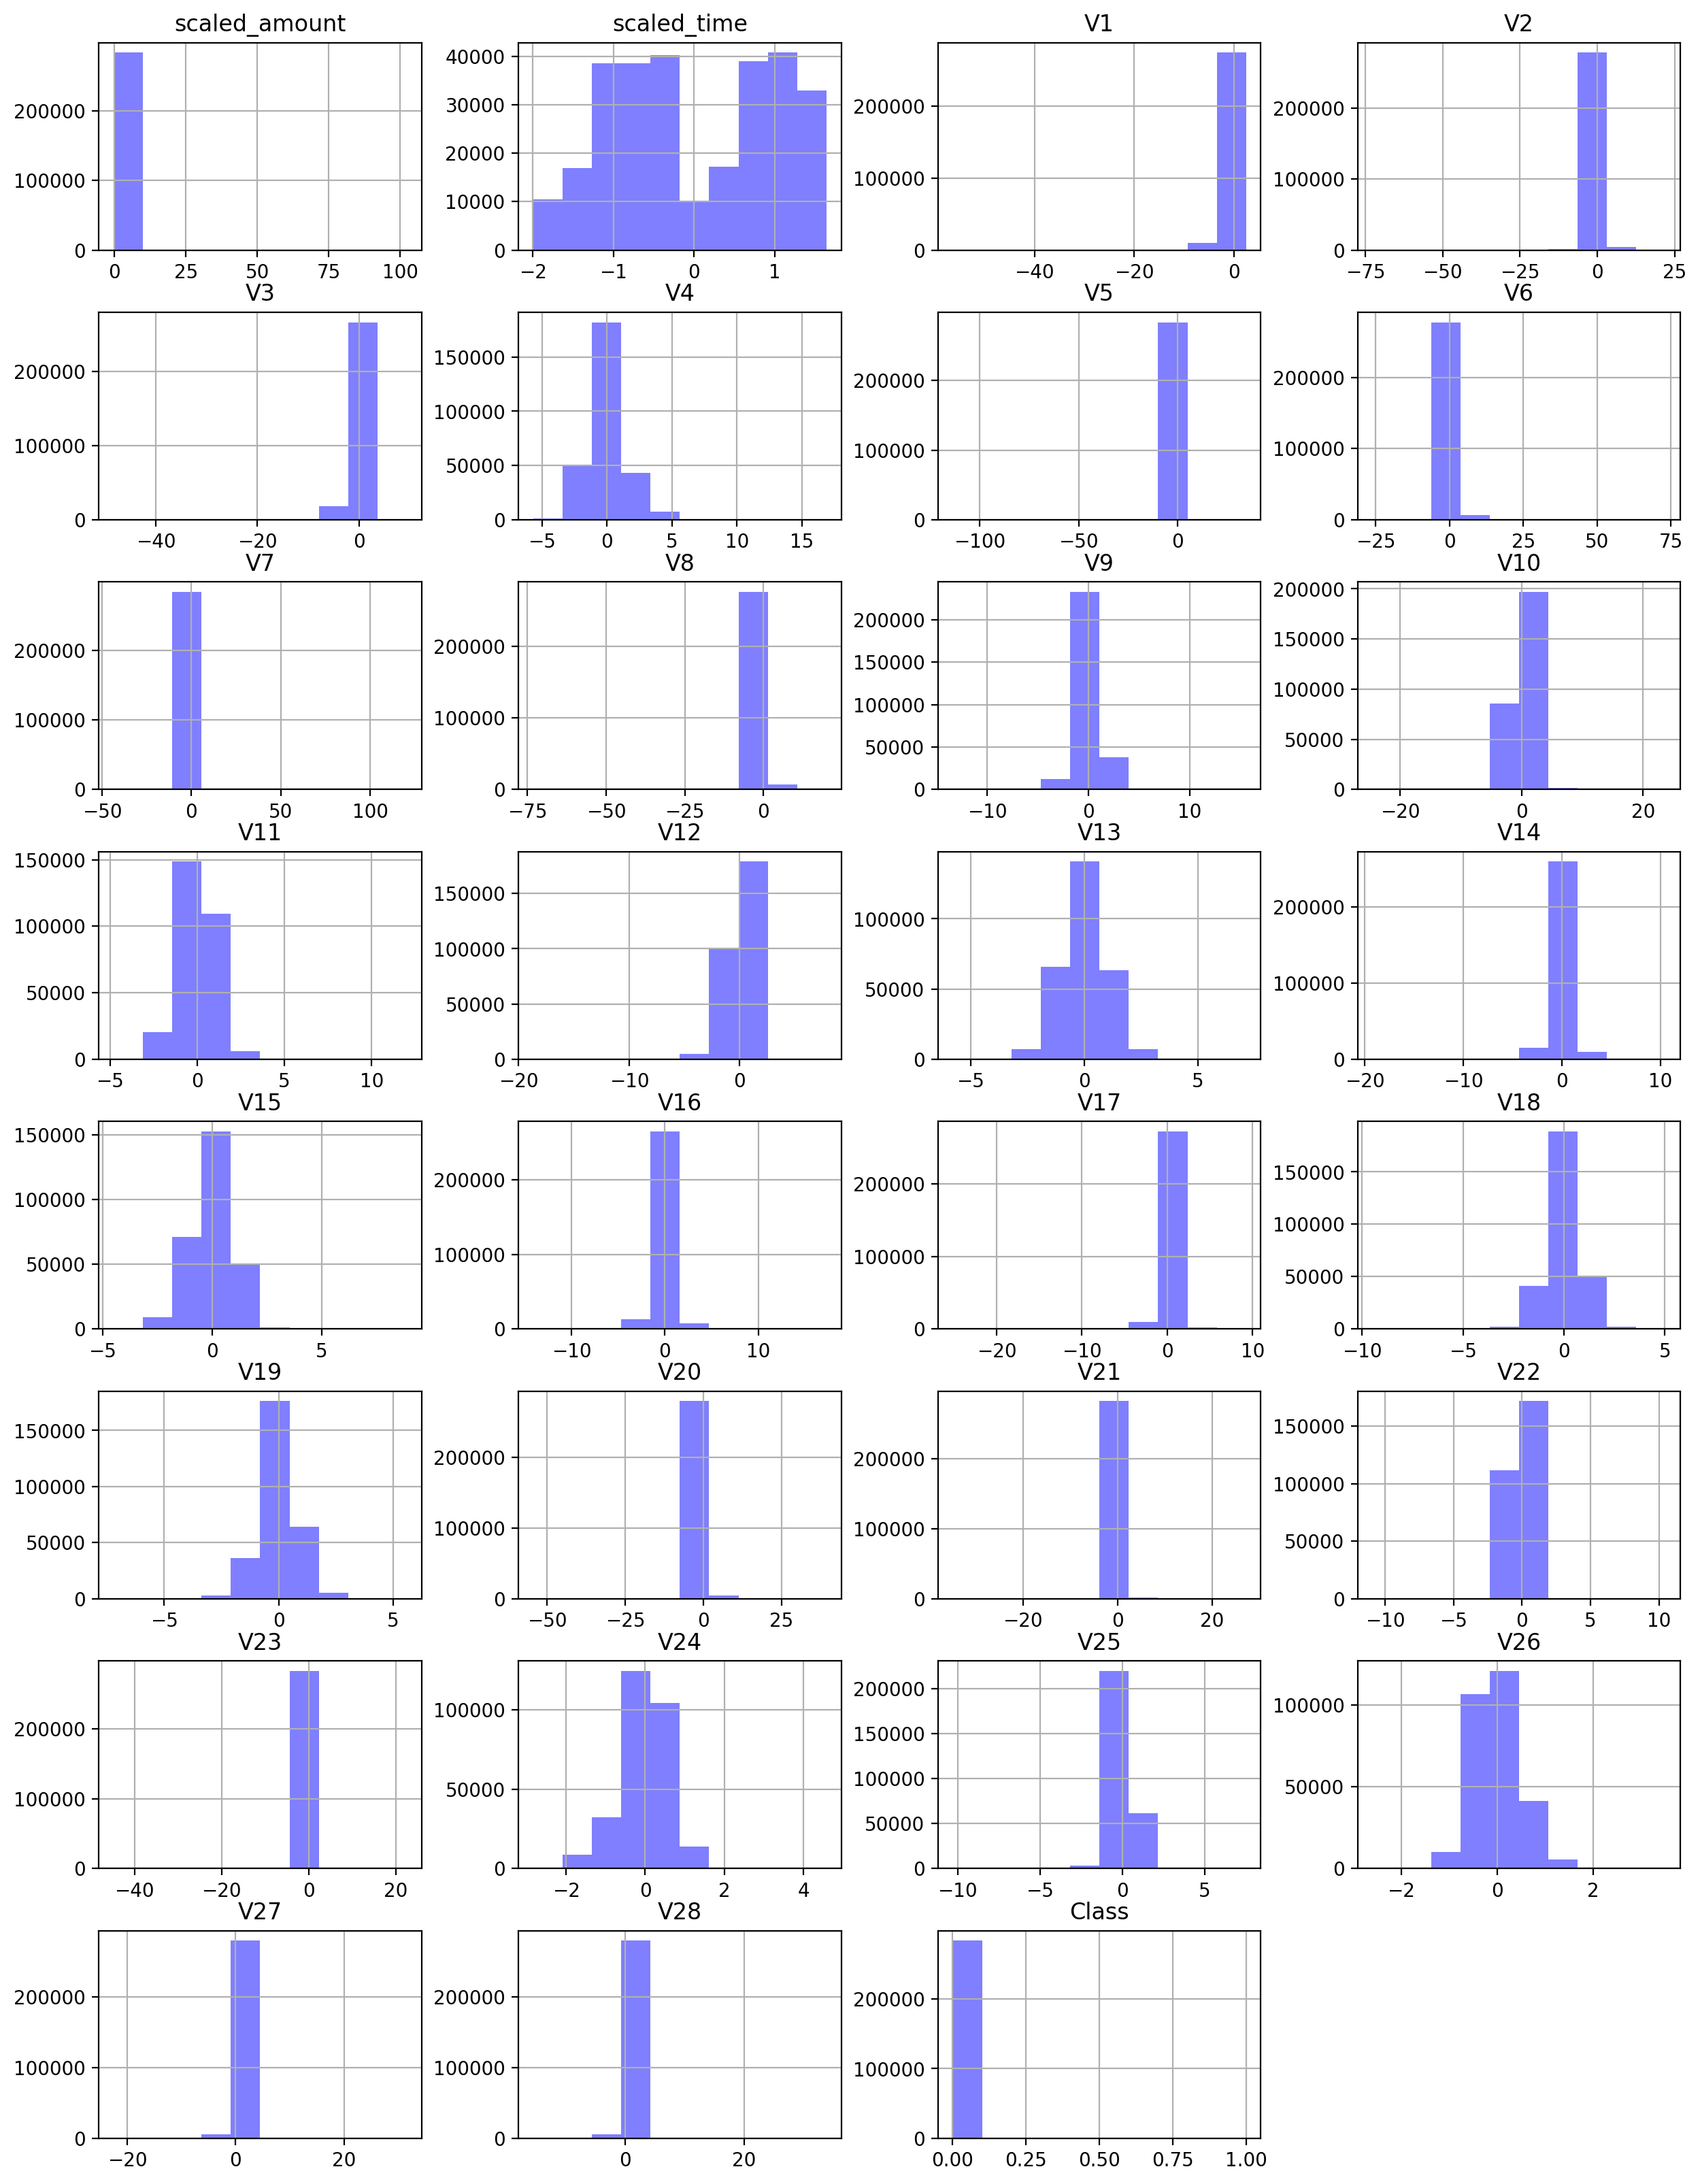

In [25]:
credit_df.hist(layout = (8, 4),
               figsize = (15, 20),
               color = 'blue', 
               alpha = 0.5) ;

## 4.2 Split the Dataset

In [26]:
X = credit_df.drop('Class', axis = 'columns')
y = credit_df['Class']

# Test
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Validate, Training
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size = 0.2, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f'Faudulant transaction weight: {w_n}')
print(f'Non-Fraudulant transaction weight: {w_p}')


Faudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [27]:
print(f'{X_train_v.shape, y_train_v.shape}')
print(f'{X_test.shape, y_test.shape}')
print('-' * 100)
print(f'{X_train.shape, y_train.shape}')
print(f'{X_validate.shape, y_validate.shape}')

((199364, 30), (199364,))
((85443, 30), (85443,))
----------------------------------------------------------------------------------------------------
((159491, 30), (159491,))
((39873, 30), (39873,))


In [28]:
print(f'Training: X_train: {X_train.shape}, y_train: {y_train.shape}')
print('-' * 60)
print(f'Validatetion: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}')
print('-' * 60)
print(f'Testing: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training: X_train: (159491, 30), y_train: (159491,)
------------------------------------------------------------
Validatetion: X_validate: (39873, 30), y_validate: (39873,)
------------------------------------------------------------
Testing: X_test: (85443, 30), y_test: (85443,)


## 4.3 Create Function for display Accuracy & Classification Report & Confustion Metrix

In [29]:
def print_score(label, prediction, train = True) :
    if train :
        clf_report = pd.DataFrame(classification_report(y_true = label, 
                                                        y_pred = prediction, 
                                                        output_dict = True,
                                                        target_names = ['No Frauds', 'Frauds'])).T # 0 = No Frauds, 1 = Frauds
        print(f'Train Result: \n============================================================')
        print(f'Accuracy Score: {accuracy_score(y_true = label, y_pred = prediction) * 100:.4f} %')
        print('____________________________________________________________')
        print(f'Classification Report: \n {clf_report}')
        print('____________________________________________________________')
        print(f'Confusion Matrix: \n {confusion_matrix(y_train, prediction)} \n')   
    elif train == False :
        clf_report = pd.DataFrame(classification_report(y_true = label, 
                                                        y_pred = prediction, 
                                                        output_dict = True,
                                                        target_names = ['No Frauds', 'Frauds'])).T
        print(f'Test Result: \n============================================================')        
        print(f'Accuracy Score: {accuracy_score(y_true = label, y_pred = prediction) * 100:.4f} %')
        print('____________________________________________________________')
        print(f'Classification Report: \n {clf_report}')
        print('____________________________________________________________')
        print(f'Confusion Matrix: \n {confusion_matrix(label, prediction)} \n') 

# 5. Artificial Neural Network (ANNs)

## 5.1 ANN Model

In [30]:
X_train.shape

(159491, 30)

In [31]:
X_train.shape[1]

30

In [32]:
(X_train.shape[1], )

(30,)

In [33]:
ANN_model = Sequential(
    [
        keras.layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1], )),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        
        keras.layers.Dense(256, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        
        keras.layers.Dense(256, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        
        keras.layers.Dense(1, activation = 'sigmoid')
    ]
)

ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

## 5.2 Compile and Fit ANNs Model

In [34]:
metrics = [
    # keras.metrics.Accuracy(name = 'accuracy'),
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.FalsePositives(name = 'fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.TruePositives(name = 'tp'),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall'),
    'accuracy' # metrics = ['accuracy']
]

ANN_model.compile(optimizer = keras.optimizers.Adam(1e-4), # 0.0001
                  loss = 'binary_crossentropy', 
                  metrics = metrics) # metrics = ['accuracy']

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0 : w_p, 1 : w_n}

r = ANN_model.fit(X_train, 
                  y_train, 
                  validation_data = (X_validate, y_validate),
                  batch_size = 2048, 
                  epochs = 100, 
                  # class_weight = class_weight,
                  callbacks = callbacks)


Epoch 1/100
78/78 [==============================] - 7s 65ms/step - loss: 0.8183 - fn: 69.0000 - fp: 73480.0000 - tn: 85724.0000 - tp: 218.0000 - precision: 0.0030 - recall: 0.7596 - accuracy: 0.5389 - val_loss: 0.5893 - val_fn: 11.0000 - val_fp: 937.0000 - val_tn: 38867.0000 - val_tp: 58.0000 - val_precision: 0.0583 - val_recall: 0.8406 - val_accuracy: 0.9762
Epoch 2/100
78/78 [==============================] - 4s 57ms/step - loss: 0.6969 - fn: 50.0000 - fp: 61792.0000 - tn: 97412.0000 - tp: 237.0000 - precision: 0.0038 - recall: 0.8258 - accuracy: 0.6123 - val_loss: 0.5234 - val_fn: 12.0000 - val_fp: 210.0000 - val_tn: 39594.0000 - val_tp: 57.0000 - val_precision: 0.2135 - val_recall: 0.8261 - val_accuracy: 0.9944
Epoch 3/100
78/78 [==============================] - 4s 56ms/step - loss: 0.6133 - fn: 42.0000 - fp: 49165.0000 - tn: 110039.0000 - tp: 245.0000 - precision: 0.0050 - recall: 0.8537 - accuracy: 0.6915 - val_loss: 0.4683 - val_fn: 12.0000 - val_fp: 86.0000 - val_tn: 39718.00

## 5.3 Evaluate ANNs Model

In [35]:
score_train_ann = ANN_model.evaluate(X_train, y_train)
print(score_train_ann)

4985/4985 [==============================] - 11s 2ms/step - loss: 0.0025 - fn: 65.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 222.0000 - precision: 0.9610 - recall: 0.7735 - accuracy: 0.9995
[0.002465992933139205, 65.0, 9.0, 159195.0, 222.0, 0.9610389471054077, 0.7735191583633423, 0.9995360374450684]


In [36]:
score_val_ann = ANN_model.evaluate(X_validate, y_validate)
print(score_val_ann)

1247/1247 [==============================] - 3s 2ms/step - loss: 0.0051 - fn: 17.0000 - fp: 8.0000 - tn: 39796.0000 - tp: 52.0000 - precision: 0.8667 - recall: 0.7536 - accuracy: 0.9994
[0.005068829283118248, 17.0, 8.0, 39796.0, 52.0, 0.8666666746139526, 0.7536231875419617, 0.9993730187416077]


In [37]:
score_test_ann = ANN_model.evaluate(X_test, y_test)
print(score_test_ann)

2671/2671 [==============================] - 7s 3ms/step - loss: 0.0030 - fn: 30.0000 - fp: 14.0000 - tn: 85293.0000 - tp: 106.0000 - precision: 0.8833 - recall: 0.7794 - accuracy: 0.9995
[0.0030254777520895004, 30.0, 14.0, 85293.0, 106.0, 0.8833333253860474, 0.779411792755127, 0.9994850158691406]


## 5.4 Plot Evolution During Training

In [38]:
r.history.keys()

dict_keys(['loss', 'fn', 'fp', 'tn', 'tp', 'precision', 'recall', 'accuracy', 'val_loss', 'val_fn', 'val_fp', 'val_tn', 'val_tp', 'val_precision', 'val_recall', 'val_accuracy'])

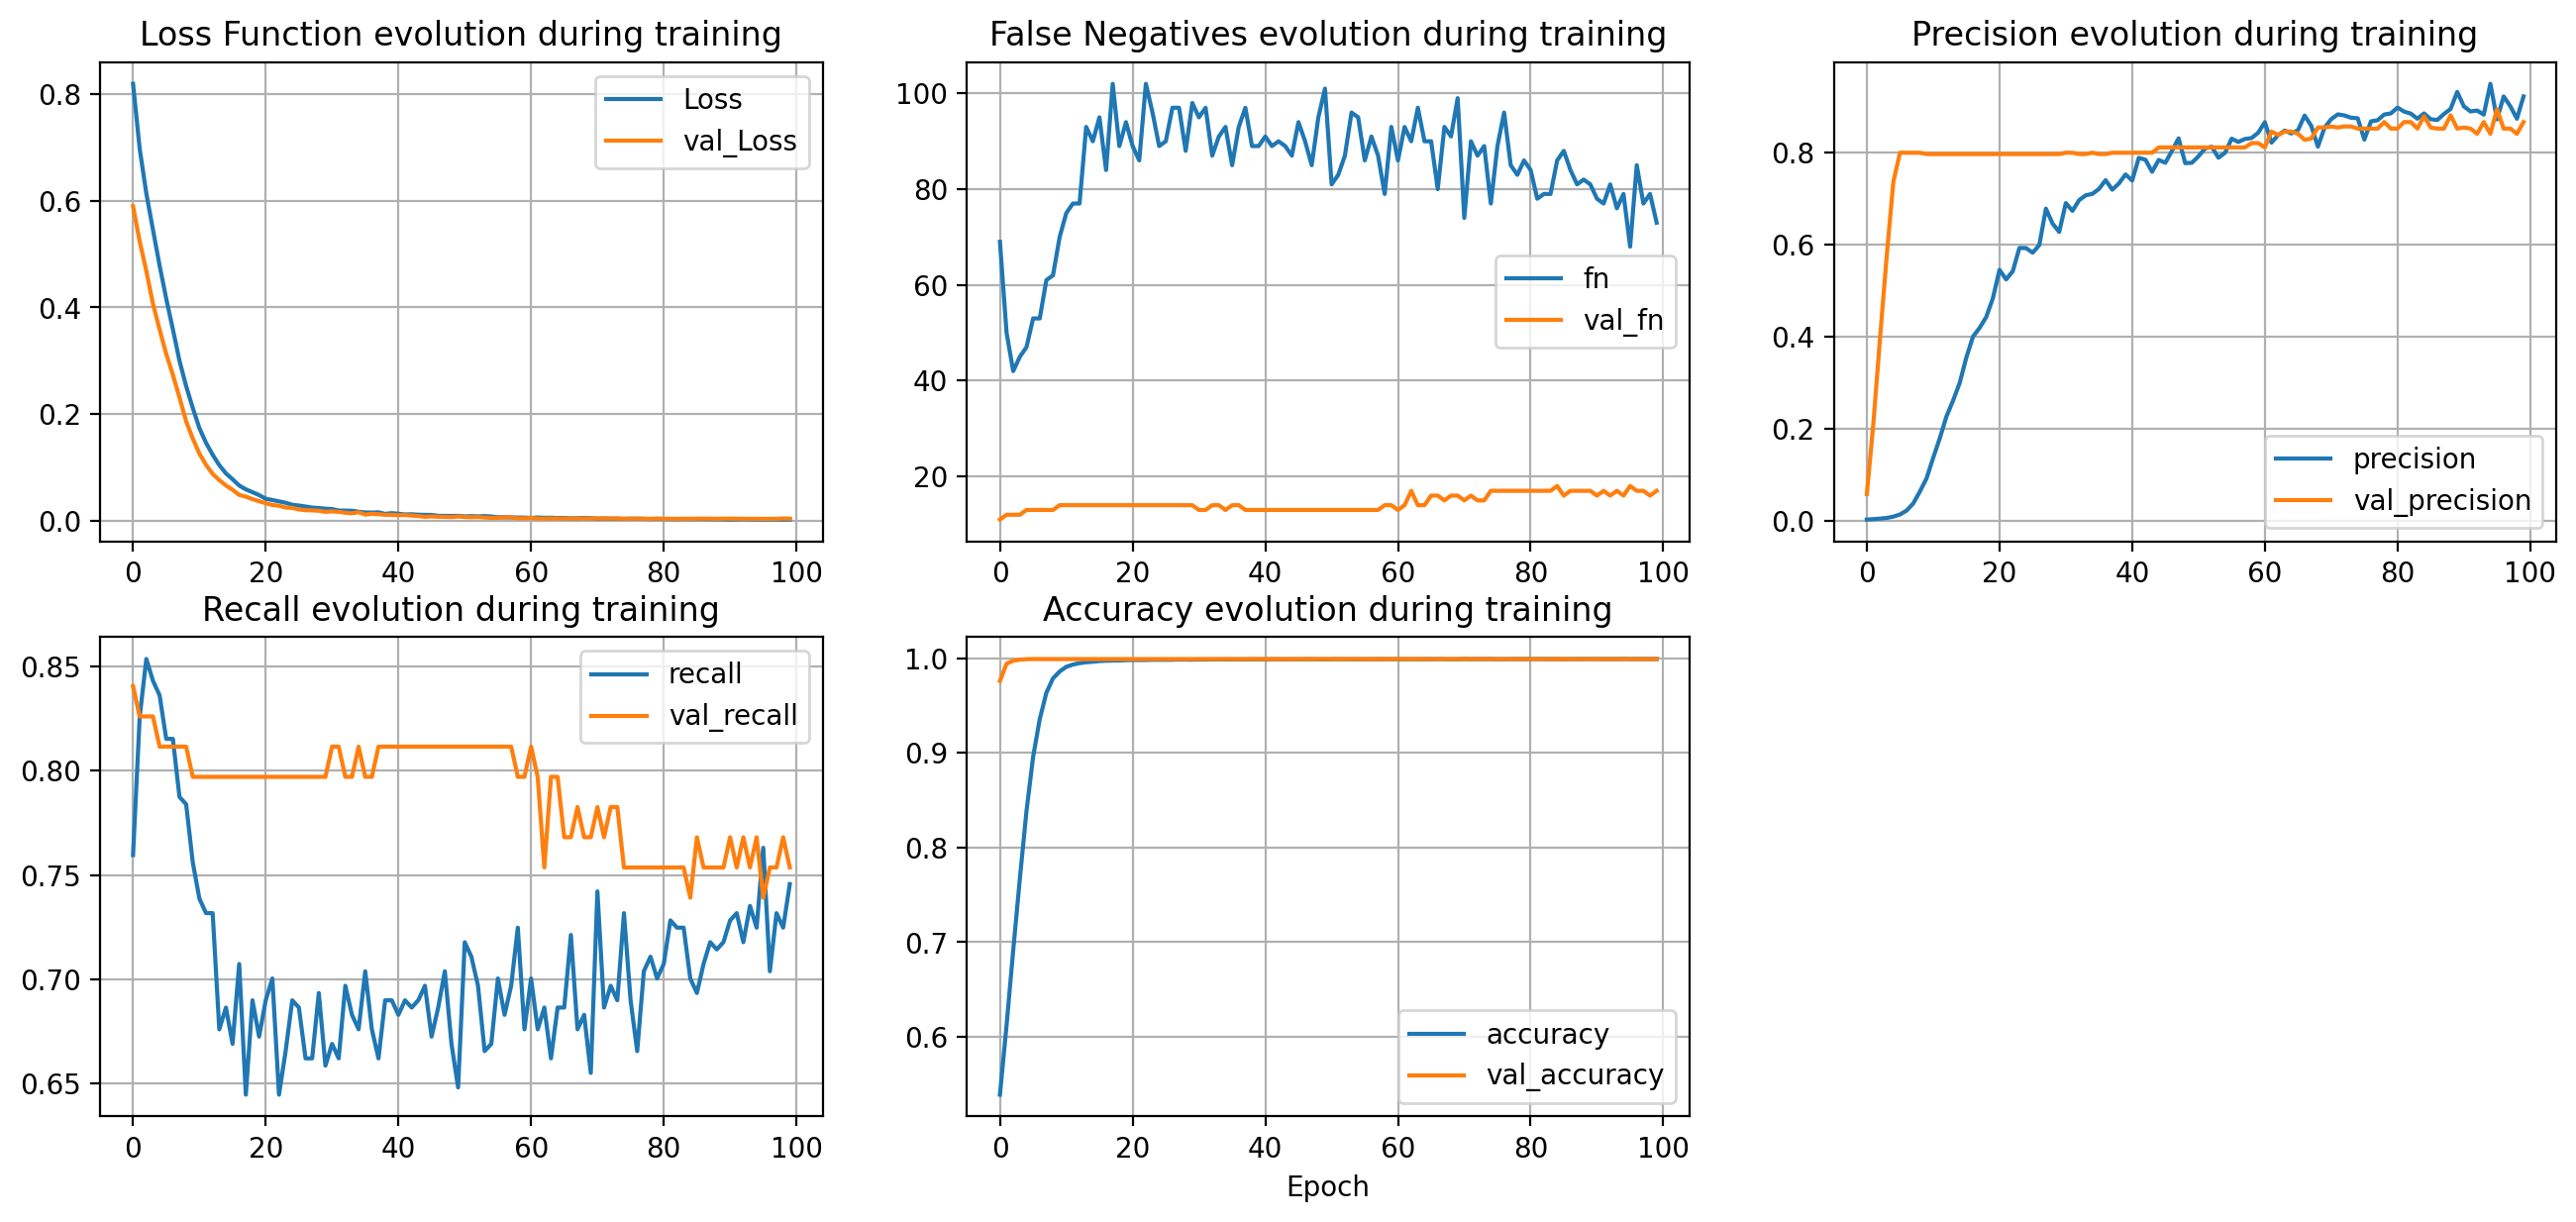

In [39]:
plt.figure(figsize = (16, 22))

plt.subplot(6, 3, 1)
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 2)
plt.plot(r.history['fn'], label = 'fn')
plt.plot(r.history['val_fn'], label = 'val_fn')
plt.title('False Negatives evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 3)
plt.plot(r.history['precision'], label = 'precision')
plt.plot(r.history['val_precision'], label = 'val_precision')
plt.title('Precision evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 4)
plt.plot(r.history['recall'], label = 'recall')
plt.plot(r.history['val_recall'], label = 'val_recall')
plt.title('Recall evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 5)
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy evolution during training')
plt.legend()
plt.grid()
plt.xlabel('Epoch') ;

## 5.5 Prediction

In [40]:
y_train_pred_ANNs = ANN_model.predict(X_train)
y_test_pred_ANNs = ANN_model.predict(X_test)

2671/2671 [==============================] - 5s 2ms/step


## 5.6 Accuracy & Classification Report & Confustion Metrix

In [41]:
print_score(y_train, y_train_pred_ANNs.round(), train = True)
print_score(y_test, y_test_pred_ANNs.round(), train = False)

Train Result: 
Accuracy Score: 99.9536 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999592  0.999943  0.999768  159204.000000
Frauds         0.961039  0.773519  0.857143     287.000000
accuracy       0.999536  0.999536  0.999536       0.999536
macro avg      0.980315  0.886731  0.928455  159491.000000
weighted avg   0.999522  0.999536  0.999511  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159195      9]
 [    65    222]] 

Test Result: 
Accuracy Score: 99.9485 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999648  0.999836  0.999742  85307.000000
Frauds         0.883333  0.779412  0.828125    136.000000
accuracy       0.999485  0.999485  0.999485      0.999485
macro avg      0.941491  0.889624  0.913934

In [42]:
conf_matrix = confusion_matrix(y_test, y_test_pred_ANNs.round())
conf_matrix

array([[85293,    14],
       [   30,   106]], dtype=int64)

In [43]:
print(f'Accuracy = {(85293 + 110) / (85293 + 14 + 26 + 110)}')
print(f'Precision = {110 / (110 + 14)}') # TP / (TP + FP)
print(f'Recall = {110 / (110 + 26)}') # TP / (TP + FN)

Accuracy = 0.9995318516437859
Precision = 0.8870967741935484
Recall = 0.8088235294117647


## 5.7 Scores Dict

In [44]:
scores_dict = {'ANNs': 
                       {
                           'Train': f1_score(y_train, y_train_pred_ANNs.round()),
                           'Test': f1_score(y_test, y_test_pred_ANNs.round()), 
                       }, 
              }

scores_dict

{'ANNs': {'Train': 0.8571428571428571, 'Test': 0.8281250000000001}}

In [45]:
acc_dict = {'ANNs': 
                       {
                           'Train': accuracy_score(y_train, y_train_pred_ANNs.round()).round(6) * 100,
                           'Test': accuracy_score(y_test, y_test_pred_ANNs.round()).round(6) * 100
                       }
              }

acc_dict

{'ANNs': {'Train': 99.9536, 'Test': 99.9485}}

# 6. XGBoost

## 6.1 XGBoost Model

In [46]:
XGB_model = XGBClassifier()

In [47]:
XGB_model.fit(X_train, y_train, eval_metric = 'aucpr')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 6.2 Prediction

In [48]:
y_train_pred_XGB = XGB_model.predict(X_train)
y_test_pred_XGB = XGB_model.predict(X_test)

## 6.3 Accuracy & Classification Report & Confustion Metrix

In [49]:
print_score(y_train, y_train_pred_XGB, train = True)
print_score(y_test, y_test_pred_XGB, train = False)

Train Result: 
Accuracy Score: 100.0000 %
____________________________________________________________
Classification Report: 
               precision  recall  f1-score   support
No Frauds           1.0     1.0       1.0  159204.0
Frauds              1.0     1.0       1.0     287.0
accuracy            1.0     1.0       1.0       1.0
macro avg           1.0     1.0       1.0  159491.0
weighted avg        1.0     1.0       1.0  159491.0
____________________________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]] 

Test Result: 
Accuracy Score: 99.9672 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999730  0.999941  0.999836  85307.000000
Frauds         0.957627  0.830882  0.889764    136.000000
accuracy       0.999672  0.999672  0.999672      0.999672
macro avg      0.978679  0.915412  0.944800  85443.000000
weighted avg   0.999663  0

## 6.4 Scores Dict

In [50]:
scores_dict['XGBoost'] = {
        'Train': f1_score(y_train, y_train_pred_XGB),
        'Test': f1_score(y_test, y_test_pred_XGB),
}

scores_dict['XGBoost']

{'Train': 1.0, 'Test': 0.8897637795275591}

In [51]:
acc_dict['XGBoost'] = {
        'Train': accuracy_score(y_train, y_train_pred_XGB).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_XGB).round(6) * 100,
}

acc_dict['XGBoost']

{'Train': 100.0, 'Test': 99.9672}

# 7. Random Forest

## 7.1 Random Forest Model

In [52]:
RF_model = RandomForestClassifier()

In [53]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

## 7.2 Prediction

In [54]:
y_train_pred_RF = RF_model.predict(X_train)
y_test_pred_RF = RF_model.predict(X_test)

## 7.3 Accuracy & Classification Report & Confustion Metrix

In [55]:
print_score(y_train, y_train_pred_RF, train = True)
print_score(y_test, y_test_pred_RF, train = False)

Train Result: 
Accuracy Score: 100.0000 %
____________________________________________________________
Classification Report: 
               precision  recall  f1-score   support
No Frauds           1.0     1.0       1.0  159204.0
Frauds              1.0     1.0       1.0     287.0
accuracy            1.0     1.0       1.0       1.0
macro avg           1.0     1.0       1.0  159491.0
weighted avg        1.0     1.0       1.0  159491.0
____________________________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]] 

Test Result: 
Accuracy Score: 99.9567 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999684  0.999883  0.999783  85307.000000
Frauds         0.915966  0.801471  0.854902    136.000000
accuracy       0.999567  0.999567  0.999567      0.999567
macro avg      0.957825  0.900677  0.927343  85443.000000
weighted avg   0.999550  0

## 7.4 Scores Dict

In [56]:
scores_dict['Random Forest'] = {
        'Train': f1_score(y_train, y_train_pred_RF),
        'Test': f1_score(y_test, y_test_pred_RF),
}

scores_dict['Random Forest']

{'Train': 1.0, 'Test': 0.8549019607843137}

In [57]:
acc_dict['Random Forest'] = {
        'Train': accuracy_score(y_train, y_train_pred_RF).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_RF).round(6) * 100,
}

acc_dict['Random Forest']

{'Train': 100.0, 'Test': 99.9567}

# 8. CatBoost

## 8.1 CatBoost Model

In [58]:
CatB_model = CatBoostClassifier()

In [59]:
CatB_model.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.4020320	total: 90.5ms	remaining: 1m 30s
1:	learn: 0.2311339	total: 170ms	remaining: 1m 24s
2:	learn: 0.1348445	total: 210ms	remaining: 1m 9s
3:	learn: 0.0813492	total: 242ms	remaining: 1m
4:	learn: 0.0503162	total: 275ms	remaining: 54.8s
5:	learn: 0.0325125	total: 310ms	remaining: 51.4s
6:	learn: 0.0221066	total: 343ms	remaining: 48.7s
7:	learn: 0.0158452	total: 375ms	remaining: 46.6s
8:	learn: 0.0118741	total: 407ms	remaining: 44.8s
9:	learn: 0.0092186	total: 440ms	remaining: 43.6s
10:	learn: 0.0074533	total: 474ms	remaining: 42.6s
11:	learn: 0.0063184	total: 507ms	remaining: 41.8s
12:	learn: 0.0054075	total: 539ms	remaining: 41s
13:	learn: 0.0047888	total: 574ms	remaining: 40.4s
14:	learn: 0.0042978	total: 609ms	remaining: 40s
15:	learn: 0.0039687	total: 647ms	remaining: 39.8s
16:	learn: 0.0037039	total: 680ms	remaining: 39.3s
17:	learn: 0.0035068	total: 714ms	remaining: 38.9s
18:	learn: 0.0033279	total: 760ms	remaining: 39.2s
19:	learn: 0.00

## 8.2 Prediction

In [60]:
y_train_pred_CatB = CatB_model.predict(X_train)
y_test_pred_CatB = CatB_model.predict(X_test)

## 8.3 Accuracy & Classification Report & Confustion Metrix

In [61]:
print_score(y_train, y_train_pred_CatB, train = True)
print_score(y_test, y_test_pred_CatB, train = False)

Train Result: 
Accuracy Score: 99.9994 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999994  1.000000  0.999997  159204.000000
Frauds         1.000000  0.996516  0.998255     287.000000
accuracy       0.999994  0.999994  0.999994       0.999994
macro avg      0.999997  0.998258  0.999126  159491.000000
weighted avg   0.999994  0.999994  0.999994  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]] 

Test Result: 
Accuracy Score: 99.9602 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999672  0.999930  0.999801  85307.000000
Frauds         0.947368  0.794118  0.864000    136.000000
accuracy       0.999602  0.999602  0.999602      0.999602
macro avg      0.973520  0.897024  0.931900

## 8.4 Scores Dict

In [62]:
scores_dict['CatBoost'] = {
        'Train': f1_score(y_train, y_train_pred_CatB),
        'Test': f1_score(y_test, y_test_pred_CatB),
}

scores_dict['CatBoost']

{'Train': 0.9982547993019197, 'Test': 0.864}

In [63]:
acc_dict['CatBoost'] = {
        'Train': accuracy_score(y_train, y_train_pred_CatB).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_CatB).round(6) * 100
}

acc_dict['CatBoost']

{'Train': 99.99940000000001, 'Test': 99.9602}

# 9. LigthGBM

## 9.1 LigthGBM Model

In [64]:
LGBM_model = LGBMClassifier()

In [65]:
LGBM_model.fit(X_train, y_train)

LGBMClassifier()

## 9.2 Prediction

In [66]:
y_train_pred_LGBM = LGBM_model.predict(X_train)
y_test_pred_LGBM = LGBM_model.predict(X_test)

## 9.3 Accuracy & Classification Report & Confustion Metrix

In [67]:
print_score(y_train, y_train_pred_LGBM, train = True)
print_score(y_test, y_test_pred_LGBM, train = False)

Train Result: 
Accuracy Score: 99.8671 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999441  0.999227  0.999334  159204.000000
Frauds         0.616822  0.689895  0.651316     287.000000
accuracy       0.998671  0.998671  0.998671       0.998671
macro avg      0.808132  0.844561  0.825325  159491.000000
weighted avg   0.998752  0.998671  0.998708  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159081    123]
 [    89    198]] 

Test Result: 
Accuracy Score: 99.6840 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score      support
No Frauds      0.999237  0.997597  0.998416  85307.00000
Frauds         0.257246  0.522059  0.344660    136.00000
accuracy       0.996840  0.996840  0.996840      0.99684
macro avg      0.628242  0.759828  0.671538  85

## 9.4 Scores Dict

In [68]:
scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train, y_train_pred_LGBM),
        'Test': f1_score(y_test, y_test_pred_LGBM)
}

scores_dict['LigthGBM']

{'Train': 0.6513157894736842, 'Test': 0.3446601941747573}

In [69]:
acc_dict['LigthGBM'] = {
        'Train': accuracy_score(y_train, y_train_pred_LGBM).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_LGBM).round(6) * 100
}

acc_dict['LigthGBM']

{'Train': 99.8671, 'Test': 99.684}

# 10. Convolutional Neural Network (CNN)

## 10.1 Reshaping the input to 3D

In [70]:
X_train.shape

(159491, 30)

In [71]:
X_train.shape[0]

159491

In [72]:
X_train.shape[1]

30

In [73]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [74]:
X_train_cnn.shape

(159491, 30, 1)

In [75]:
X_test_cnn.shape

(85443, 30, 1)

## 10.2 CNN Model

In [76]:
CNN_model = Sequential()
CNN_model.add(Conv1D(32, 2, activation = 'relu', input_shape = X_train_cnn[0].shape))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.2))

CNN_model.add(Conv1D(64, 2, activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))

CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation = 'relu'))
CNN_model.add(Dropout(0.5))

CNN_model.add(Dense(1, activation = 'sigmoid'))

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization_3 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

## 10.3 Compile and Fit CNN Model

In [77]:
metrics = [
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.FalsePositives(name = 'fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.TruePositives(name = 'tp'),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall'),
    'accuracy' # metrics = ['accuracy']
]


CNN_model.compile(optimizer = keras.optimizers.Adam(1e-4),
                  loss = 'binary_crossentropy',
                  metrics = metrics)

history = CNN_model.fit(X_train, 
                        y_train,
                        epochs = 20,
                        validation_data = (X_validate, y_validate))

Epoch 1/20
4985/4985 [==============================] - 31s 6ms/step - loss: 0.0523 - fn: 116.0000 - fp: 2523.0000 - tn: 156681.0000 - tp: 171.0000 - precision: 0.0635 - recall: 0.5958 - accuracy: 0.9835 - val_loss: 0.0088 - val_fn: 18.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 51.0000 - val_precision: 0.8226 - val_recall: 0.7391 - val_accuracy: 0.9993
Epoch 2/20
4985/4985 [==============================] - 30s 6ms/step - loss: 0.0067 - fn: 103.0000 - fp: 49.0000 - tn: 159155.0000 - tp: 184.0000 - precision: 0.7897 - recall: 0.6411 - accuracy: 0.9990 - val_loss: 0.0061 - val_fn: 14.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 55.0000 - val_precision: 0.8088 - val_recall: 0.7971 - val_accuracy: 0.9993
Epoch 3/20
4985/4985 [==============================] - 32s 6ms/step - loss: 0.0056 - fn: 89.0000 - fp: 40.0000 - tn: 159164.0000 - tp: 198.0000 - precision: 0.8319 - recall: 0.6899 - accuracy: 0.9992 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 13.0000 - val_tn: 3979

## 10.4 Evaluate CNN Model

In [78]:
score_train_cnn = CNN_model.evaluate(X_train, y_train)
print(score_train_cnn)

4985/4985 [==============================] - 12s 2ms/step - loss: 0.0025 - fn: 66.0000 - fp: 27.0000 - tn: 159177.0000 - tp: 221.0000 - precision: 0.8911 - recall: 0.7700 - accuracy: 0.9994
[0.0024652983993291855, 66.0, 27.0, 159177.0, 221.0, 0.8911290168762207, 0.7700348496437073, 0.9994168877601624]


In [79]:
score_val_cnn = CNN_model.evaluate(X_validate, y_validate)
print(score_val_cnn)

1247/1247 [==============================] - 3s 2ms/step - loss: 0.0042 - fn: 16.0000 - fp: 11.0000 - tn: 39793.0000 - tp: 53.0000 - precision: 0.8281 - recall: 0.7681 - accuracy: 0.9993
[0.004249452613294125, 16.0, 11.0, 39793.0, 53.0, 0.828125, 0.7681159377098083, 0.9993228316307068]


In [80]:
score_test_cnn = CNN_model.evaluate(X_test, y_test)
print(score_test_cnn)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0030 - fn: 33.0000 - fp: 21.0000 - tn: 85286.0000 - tp: 103.0000 - precision: 0.8306 - recall: 0.7574 - accuracy: 0.9994
[0.002975422888994217, 33.0, 21.0, 85286.0, 103.0, 0.8306451439857483, 0.7573529481887817, 0.9993680119514465]


## 10.5 Plot Evolution During Training

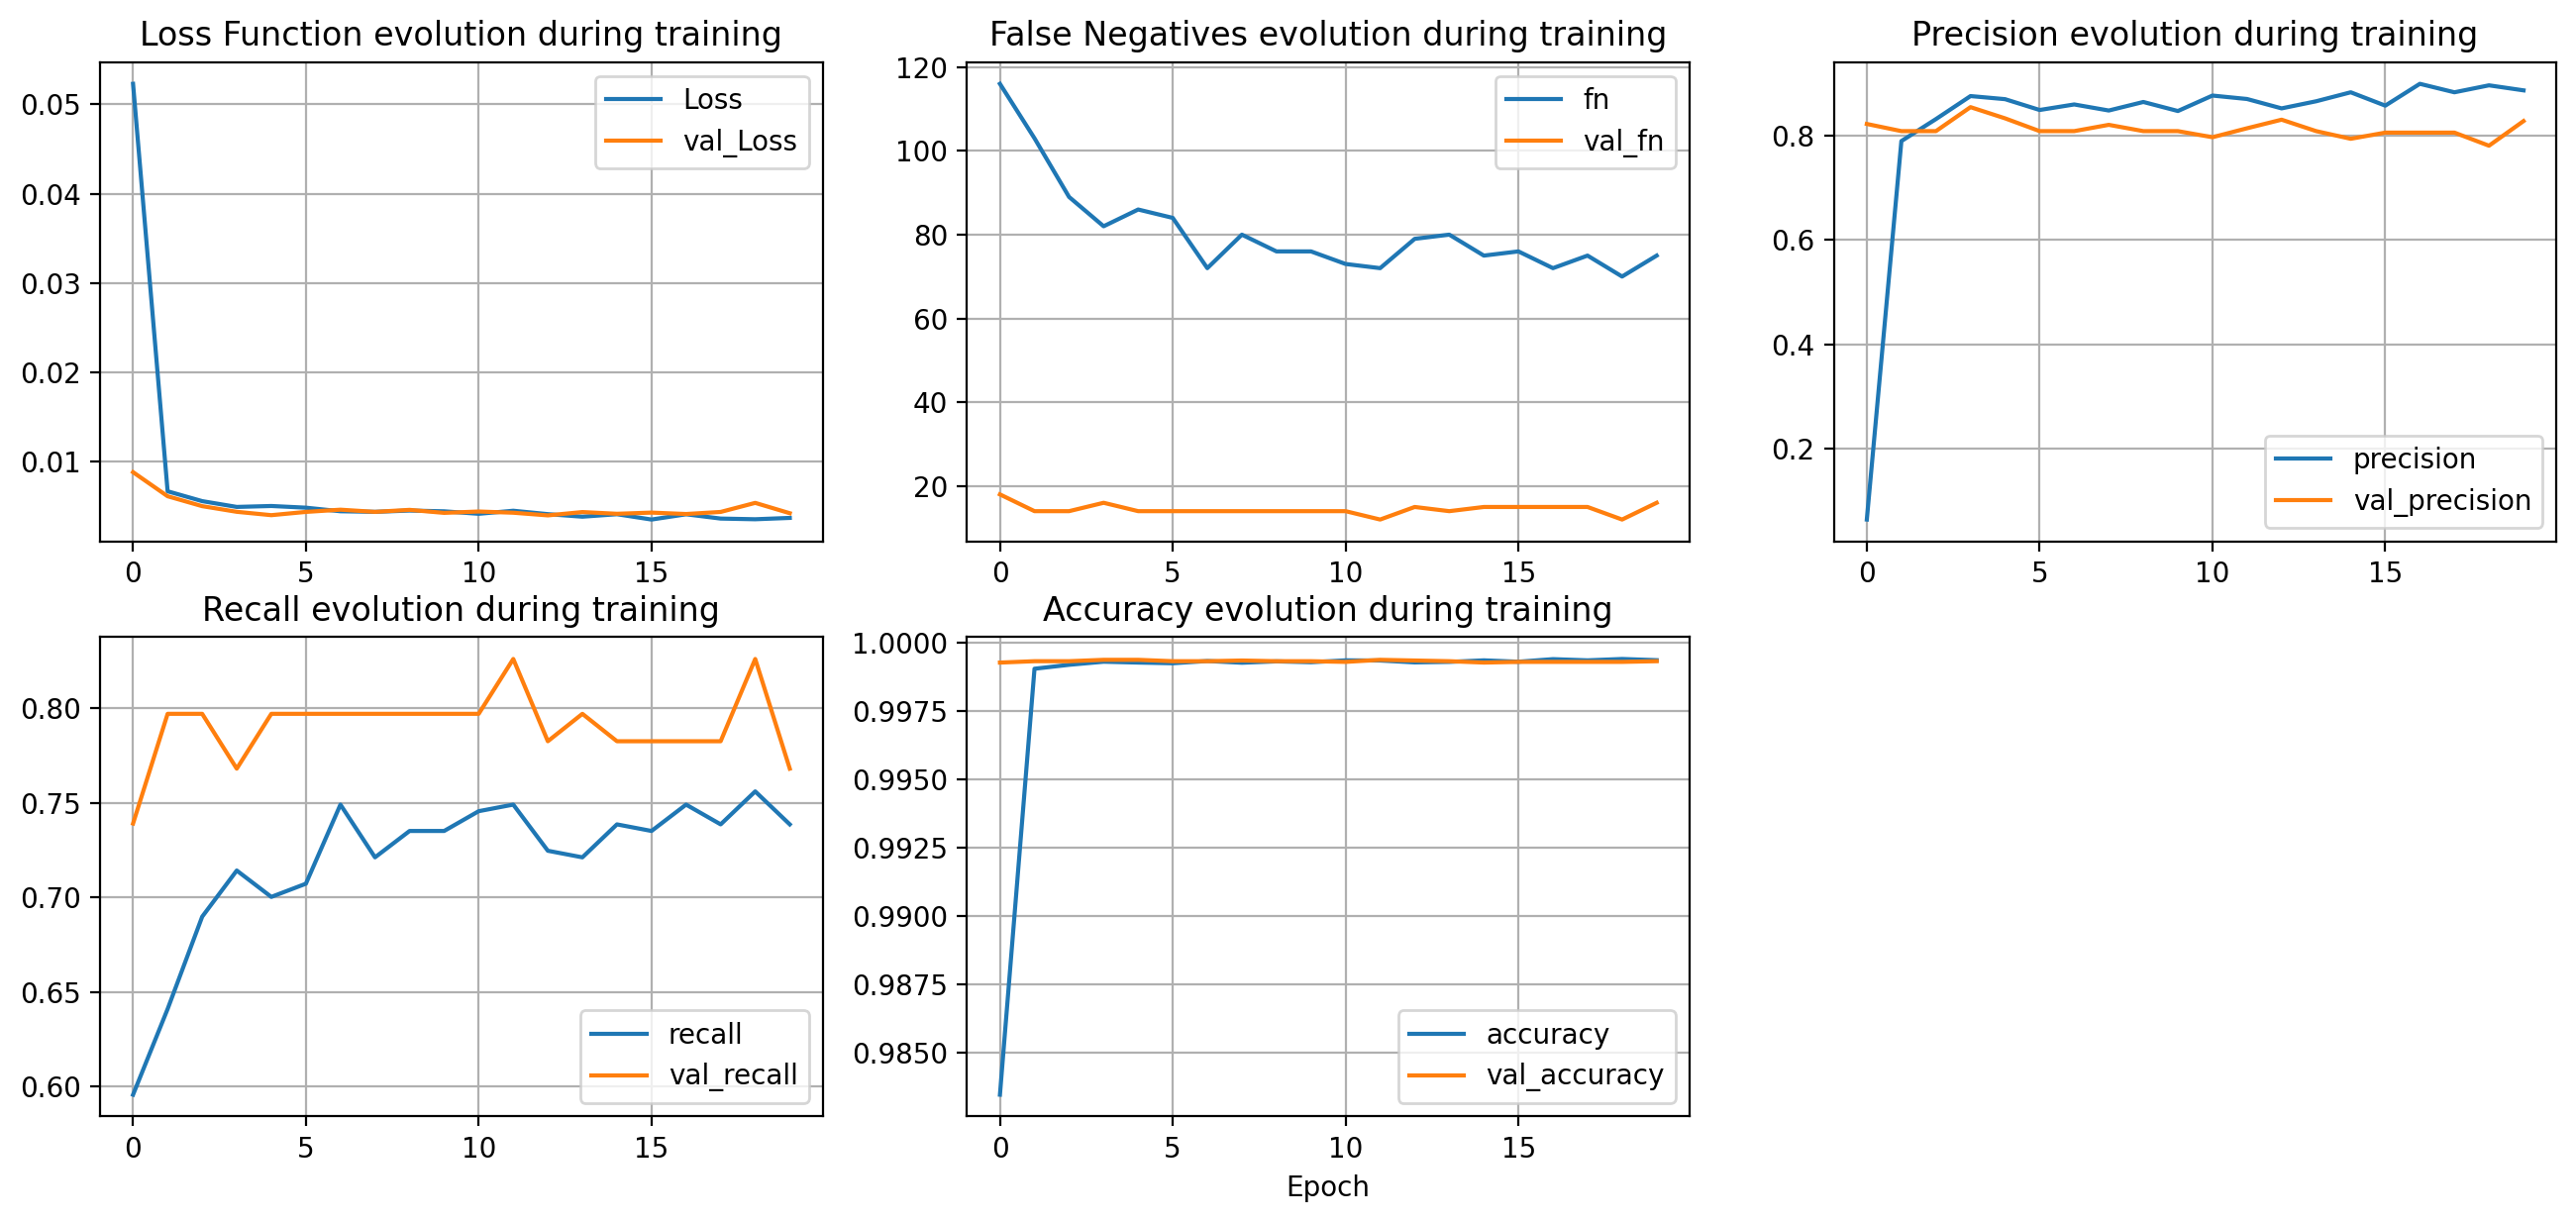

In [81]:
plt.figure(figsize = (16, 22))
plt.style.use('fast')

plt.subplot(6, 3, 1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 2)
plt.plot(history.history['fn'], label = 'fn')
plt.plot(history.history['val_fn'], label = 'val_fn')
plt.title('False Negatives evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 3)
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.title('Precision evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 4)
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.title('Recall evolution during training')
plt.legend()
plt.grid()

plt.subplot(6, 3, 5)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy evolution during training')
plt.legend()
plt.grid()
plt.xlabel('Epoch') ;

## 10.6 Prediction

In [82]:
y_train_pred_CNN = CNN_model.predict(X_train)
y_test_pred_CNN = CNN_model.predict(X_test)

2671/2671 [==============================] - 5s 2ms/step


## 10.7 Accuracy & Classification Report & Confustion Metrix 

In [83]:
print_score(y_train, y_train_pred_CNN.round(), train = True)
print_score(y_test, y_test_pred_CNN.round(), train = False)

Train Result: 
Accuracy Score: 99.9417 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999586  0.999830  0.999708  159204.000000
Frauds         0.891129  0.770035  0.826168     287.000000
accuracy       0.999417  0.999417  0.999417       0.999417
macro avg      0.945357  0.884933  0.912938  159491.000000
weighted avg   0.999390  0.999417  0.999396  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159177     27]
 [    66    221]] 

Test Result: 
Accuracy Score: 99.9368 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999613  0.999754  0.999684  85307.000000
Frauds         0.830645  0.757353  0.792308    136.000000
accuracy       0.999368  0.999368  0.999368      0.999368
macro avg      0.915129  0.878553  0.895996

## 10.8 Scores Dict

In [137]:
scores_dict['CNN'] = {
        'Train': f1_score(y_train, y_train_pred_CNN.round()),
        'Test': f1_score(y_test, y_test_pred_CNN.round())
}

scores_dict['CNN']

{'Train': 0.8261682242990653, 'Test': 0.7923076923076924}

In [138]:
acc_dict['CNN'] = {
        'Train': accuracy_score(y_train, y_train_pred_CNN.round()).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_CNN.round()).round(6) * 100
}

acc_dict['CNN']

{'Train': 99.9417, 'Test': 99.9368}

# 11. Logistic Regression 

## 11.1 Logistic Regression Model

In [86]:
log_model = LogisticRegression()

In [87]:
log_model.fit(X_train, y_train)

LogisticRegression()

## 11.2 Prediction

In [88]:
y_train_pred_log = log_model.predict(X_train)
y_test_pred_log = log_model.predict(X_test)

## 11.3 Accuracy & Classification Report & Confustion Metrix

In [89]:
print_score(y_train, y_train_pred_log, train = True)
print_score(y_test, y_test_pred_log, train = False)

Train Result: 
Accuracy Score: 99.9185 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999322  0.999862  0.999592  159204.000000
Frauds         0.890547  0.623693  0.733607     287.000000
accuracy       0.999185  0.999185  0.999185       0.999185
macro avg      0.944935  0.811778  0.866599  159491.000000
weighted avg   0.999126  0.999185  0.999113  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159182     22]
 [   108    179]] 

Test Result: 
Accuracy Score: 99.9274 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999426  0.999848  0.999637  85307.000000
Frauds         0.870000  0.639706  0.737288    136.000000
accuracy       0.999274  0.999274  0.999274      0.999274
macro avg      0.934713  0.819777  0.868462

## 11.4 Scores Dict

In [90]:
scores_dict['Logistic Regression'] = {
        'Train': f1_score(y_train, y_train_pred_log),
        'Test': f1_score(y_test, y_test_pred_log)
}

scores_dict['Logistic Regression']

{'Train': 0.7336065573770493, 'Test': 0.7372881355932203}

In [91]:
acc_dict['Logistic Regression'] = {
        'Train': accuracy_score(y_train, y_train_pred_log).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_log).round(6) * 100
}

acc_dict['Logistic Regression']

{'Train': 99.9185, 'Test': 99.9274}

# 12. K-Nears Neighbors (KNN)

## 12.1 KNN Model

In [92]:
# default setting
knn_model = KNeighborsClassifier(n_neighbors = 5, 
                                 algorithm = 'auto')

In [93]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## 12.2 Prediction

In [94]:
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

## 12.3 Accuracy & Classification Report & Confustion Metrix

In [95]:
print_score(y_train, y_train_pred_knn.round(), train = True)
print_score(y_test, y_test_pred_knn.round(), train = False)

Train Result: 
Accuracy Score: 99.9549 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999611  0.999937  0.999774  159204.000000
Frauds         0.957447  0.783972  0.862069     287.000000
accuracy       0.999549  0.999549  0.999549       0.999549
macro avg      0.978529  0.891955  0.930921  159491.000000
weighted avg   0.999535  0.999549  0.999526  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159194     10]
 [    62    225]] 

Test Result: 
Accuracy Score: 99.9450 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score      support
No Frauds      0.999637  0.999812  0.999725  85307.00000
Frauds         0.867769  0.772059  0.817121    136.00000
accuracy       0.999450  0.999450  0.999450      0.99945
macro avg      0.933703  0.885936  0.908423  85

## 12.4 Scores Dict

In [96]:
scores_dict['KNN'] = {
        'Train': f1_score(y_train, y_train_pred_knn),
        'Test': f1_score(y_test, y_test_pred_knn)
}

scores_dict['KNN']

{'Train': 0.8620689655172413, 'Test': 0.8171206225680935}

In [97]:
acc_dict['KNN'] = {
        'Train': accuracy_score(y_train, y_train_pred_knn).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_knn).round(6) * 100
}

acc_dict['KNN']

{'Train': 99.95490000000001, 'Test': 99.945}

# 13. Support Vector Classifier (SVC)

## 13.1 SVC Model

In [98]:
# default setting
svc_model = SVC()

In [99]:
svc_model.fit(X_train, y_train)

SVC()

## 13.2 Prediction

In [101]:
y_train_pred_svc = svc_model.predict(X_train)
y_test_pred_svc = svc_model.predict(X_test)

## 13.3 Accuracy & Classification Report & Confustion Metrix

In [102]:
print_score(y_train, y_train_pred_svc.round(), train = True)
print_score(y_test, y_test_pred_svc.round(), train = False)

Train Result: 
Accuracy Score: 99.9643 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score        support
No Frauds      0.999661  0.999981  0.999821  159204.000000
Frauds         0.987288  0.811847  0.891013     287.000000
accuracy       0.999643  0.999643  0.999643       0.999643
macro avg      0.993475  0.905914  0.945417  159491.000000
weighted avg   0.999639  0.999643  0.999625  159491.000000
____________________________________________________________
Confusion Matrix: 
 [[159201      3]
 [    54    233]] 

Test Result: 
Accuracy Score: 99.9356 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999449  0.999906  0.999678  85307.000000
Frauds         0.917526  0.654412  0.763948    136.000000
accuracy       0.999356  0.999356  0.999356      0.999356
macro avg      0.958488  0.827159  0.881813

## 13.4 Scores Dict

In [103]:
scores_dict['SVC'] = {
        'Train': f1_score(y_train, y_train_pred_svc),
        'Test': f1_score(y_test, y_test_pred_svc)
}

scores_dict['SVC']

{'Train': 0.8910133843212237, 'Test': 0.7639484978540773}

In [104]:
acc_dict['SVC'] = {
        'Train': accuracy_score(y_train, y_train_pred_svc).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_svc).round(6) * 100
}

acc_dict['SVC']

{'Train': 99.9643, 'Test': 99.93560000000001}

# 14. Decision Tree 

## 14.1 Decision Tree Model

In [105]:
# default setting
tree_model = DecisionTreeClassifier()

In [106]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 14.2 Prediction

In [107]:
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

## 14.3 Accuracy & Classification Report & Confustion Metrix

In [108]:
print_score(y_train, y_train_pred_tree.round(), train = True)
print_score(y_test, y_test_pred_tree.round(), train = False)

Train Result: 
Accuracy Score: 100.0000 %
____________________________________________________________
Classification Report: 
               precision  recall  f1-score   support
No Frauds           1.0     1.0       1.0  159204.0
Frauds              1.0     1.0       1.0     287.0
accuracy            1.0     1.0       1.0       1.0
macro avg           1.0     1.0       1.0  159491.0
weighted avg        1.0     1.0       1.0  159491.0
____________________________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]] 

Test Result: 
Accuracy Score: 99.8993 %
____________________________________________________________
Classification Report: 
               precision    recall  f1-score       support
No Frauds      0.999613  0.999379  0.999496  85307.000000
Frauds         0.660256  0.757353  0.705479    136.000000
accuracy       0.998993  0.998993  0.998993      0.998993
macro avg      0.829935  0.878366  0.852488  85443.000000
weighted avg   0.999073  0

## 14.4 Scores Dict

In [109]:
scores_dict['Decision Tree'] = {
        'Train': f1_score(y_train, y_train_pred_tree),
        'Test': f1_score(y_test, y_test_pred_tree)
}

scores_dict['Decision Tree']

{'Train': 1.0, 'Test': 0.7054794520547946}

In [110]:
acc_dict['Decision Tree'] = {
        'Train': accuracy_score(y_train, y_train_pred_tree).round(6) * 100,
        'Test': accuracy_score(y_test, y_test_pred_tree).round(6) * 100
}

acc_dict['Decision Tree']

{'Train': 100.0, 'Test': 99.8993}

# 15. Model Comparison

In [236]:
scores_df = pd.DataFrame(scores_dict)
scores_df.T.sort_values('Train', ascending = False)

,Train,Test
XGBoost,1.000000,0.889764
Random Forest,1.000000,0.854902
Decision Tree,1.000000,0.705479
CatBoost,0.998255,0.864000
SVC,0.891013,0.763948
KNN,0.862069,0.817121
ANNs,0.857143,0.828125
CNN,0.826168,0.792308
Logistic Regression,0.733607,0.737288
LigthGBM,0.651316,0.344660


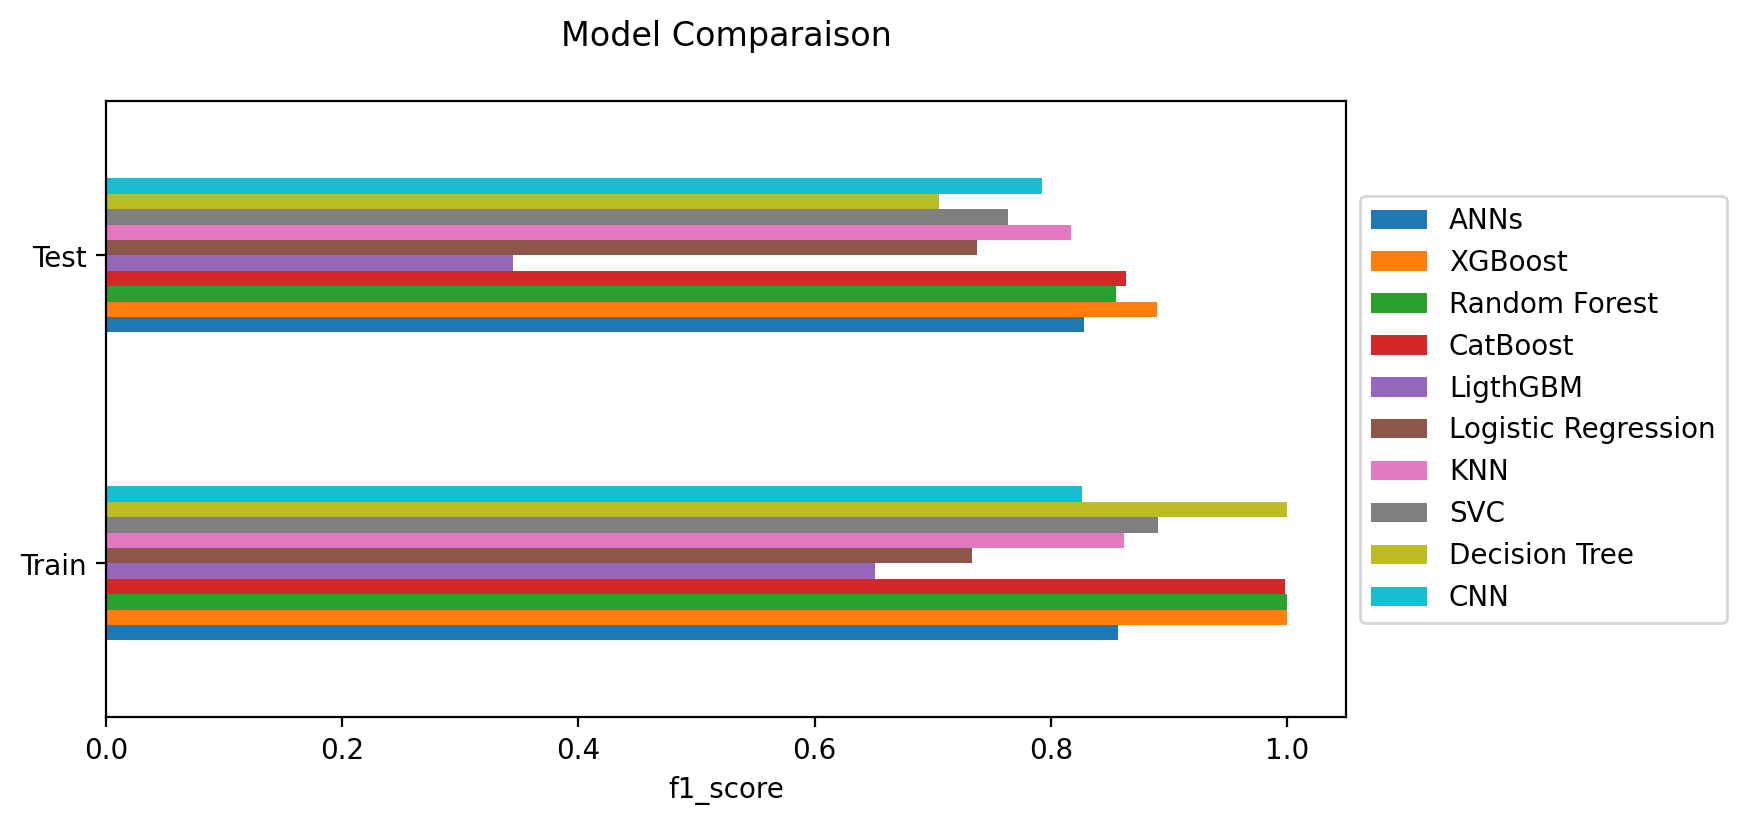

In [249]:
# plt.style.use('seaborn-whitegrid')

ax = scores_df.plot(kind = 'barh', figsize = (8, 4))

#ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
#ax.bar_label(ax.containers[2])
#ax.bar_label(ax.containers[3])
#ax.bar_label(ax.containers[4])

plt.xlabel('f1_score')
plt.title('Model Comparaison', pad = 20) 
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)) ;

In [234]:
acc_df = pd.DataFrame(acc_dict)
acc_df.T.sort_values(by = 'Train', ascending = False)

,Train,Test
XGBoost,100.0000,99.9672
Random Forest,100.0000,99.9567
Decision Tree,100.0000,99.8993
CatBoost,99.9994,99.9602
SVC,99.9643,99.9356
KNN,99.9549,99.9450
ANNs,99.9536,99.9485
CNN,99.9417,99.9368
Logistic Regression,99.9185,99.9274
LigthGBM,99.8671,99.6840


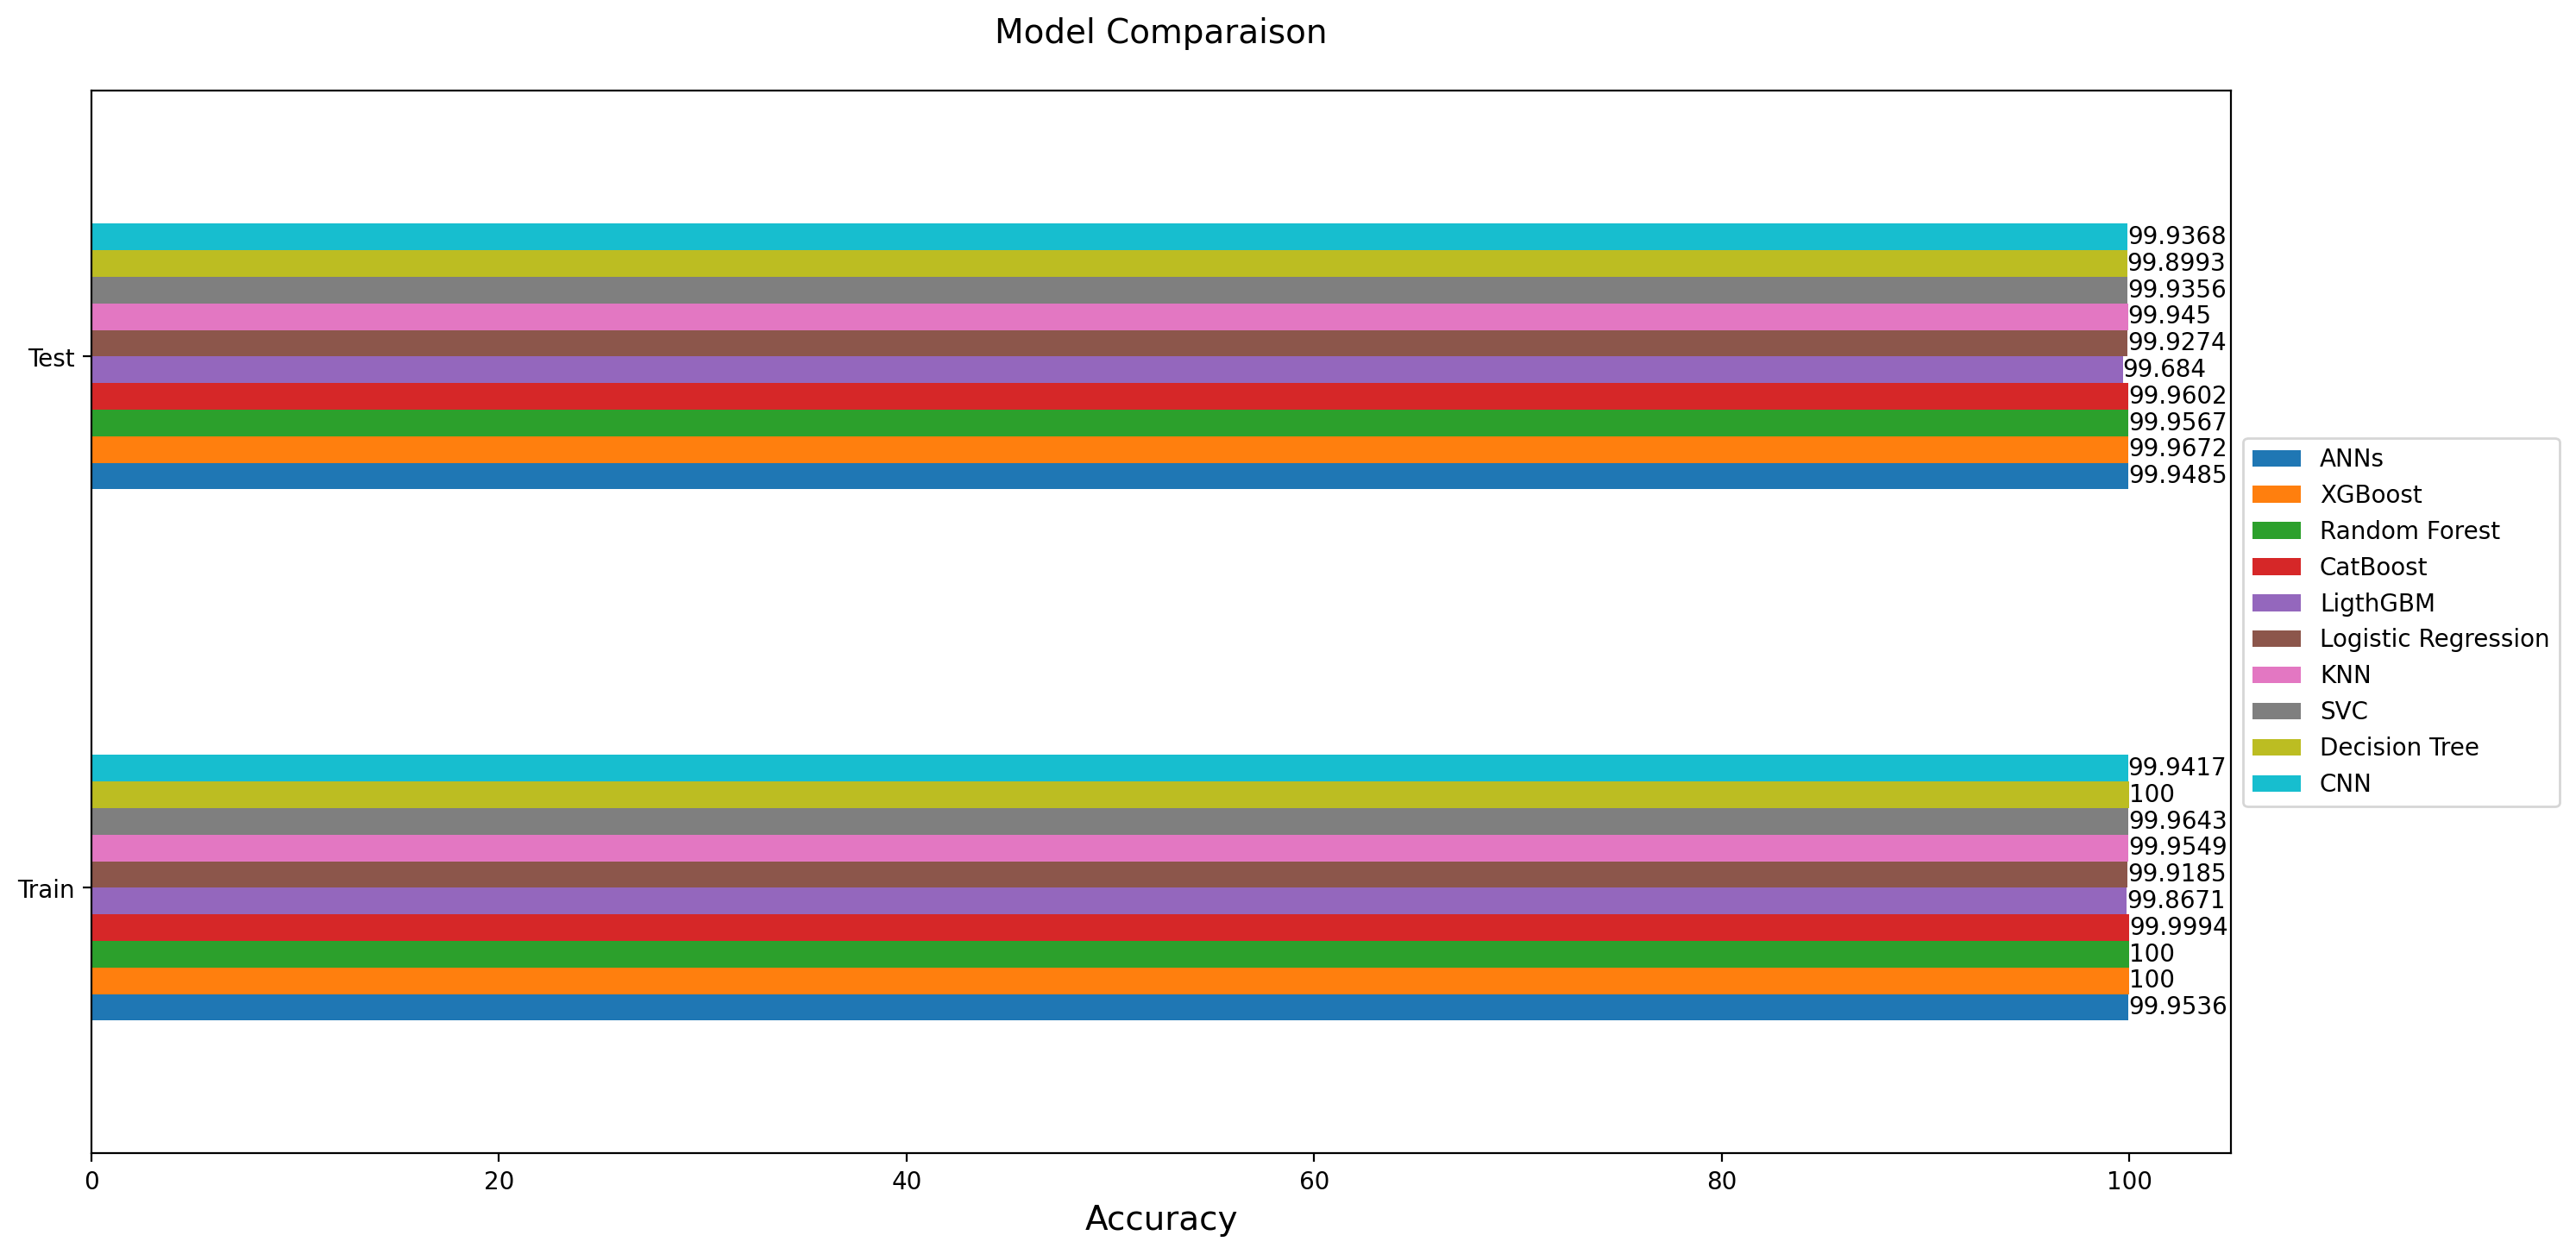

In [245]:
# plt.style.use('seaborn-whitegrid')

ax = acc_df.plot(kind = 'barh', figsize = (16, 8)) 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
ax.bar_label(ax.containers[6])
ax.bar_label(ax.containers[7])
ax.bar_label(ax.containers[8])
ax.bar_label(ax.containers[9])

plt.xlabel('Accuracy', fontsize = 14)
plt.title('Model Comparaison', pad = 20, fontsize = 14) 
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)) ;

# 16. AUC-ROC Curve

https://datascihaeng.medium.com/evaluation-matrix-part2-a7d83aea6537

## 16.1 AUC (Area Under The Curve)

In [164]:
print(f'Artificial Neural Network: {roc_auc_score(y_test, y_test_pred_ANNs)}')
print(f'XGBoost Classifier: {roc_auc_score(y_test, y_test_pred_XGB)}')
print(f'Random Forest Classifier: {roc_auc_score(y_test, y_test_pred_RF)}')
print(f'CatBoost Classifier: {roc_auc_score(y_test, y_test_pred_CatB)}')
print(f'LigthGBM Classifier: {roc_auc_score(y_test, y_test_pred_LGBM)}')
print(f'Convolutional Neural Network: {roc_auc_score(y_test, y_test_pred_CNN)}')
print(f'Logistic Regression Classifier: {roc_auc_score(y_test, y_test_pred_log)}')
print(f'K-Nears Neighbors Classifier: {roc_auc_score(y_test, y_test_pred_knn)}')
print(f'Support Vector Classifier: {roc_auc_score(y_test, y_test_pred_svc)}')
print(f'Decision Tree Classifier: {roc_auc_score(y_test, y_test_pred_tree)}')

Artificial Neural Network: 0.9555439557749554
XGBoost Classifier: 0.9154118705519649
Random Forest Classifier: 0.9006766822804004
CatBoost Classifier: 0.8970236564270637
LigthGBM Classifier: 0.7598278691011495
Convolutional Neural Network: 0.9853857417396958
Logistic Regression Classifier: 0.8197767457880499
K-Nears Neighbors Classifier: 0.8859356328251113
Support Vector Classifier: 0.8271589928831438
Decision Tree Classifier: 0.878365827850828


In [208]:
auc_dict = {
                'Artificial Neural Network' : roc_auc_score(y_test, y_test_pred_ANNs),
                'XGBoost Classifier' : roc_auc_score(y_test, y_test_pred_XGB),
                'Random Forest Classifier' : roc_auc_score(y_test, y_test_pred_RF),
                'CatBoost Classifier' : roc_auc_score(y_test, y_test_pred_CatB),
                'LigthGBM Classifier' : roc_auc_score(y_test, y_test_pred_LGBM),
                'Convolutional Neural Network' : roc_auc_score(y_test, y_test_pred_CNN),
                'Logistic Regression Classifier' : roc_auc_score(y_test, y_test_pred_log),
                'K-Nears Neighbors Classifier' : roc_auc_score(y_test, y_test_pred_knn),
                'Support Vector Classifier' : roc_auc_score(y_test, y_test_pred_svc),
                'Decision Tree Classifier' : roc_auc_score(y_test, y_test_pred_tree),
            }

auc_dict

{'Artificial Neural Network': 0.9555439557749554,
 'XGBoost Classifier': 0.9154118705519649,
 'Random Forest Classifier': 0.9006766822804004,
 'CatBoost Classifier': 0.8970236564270637,
 'LigthGBM Classifier': 0.7598278691011495,
 'Convolutional Neural Network': 0.9853857417396958,
 'Logistic Regression Classifier': 0.8197767457880499,
 'K-Nears Neighbors Classifier': 0.8859356328251113,
 'Support Vector Classifier': 0.8271589928831438,
 'Decision Tree Classifier': 0.878365827850828}

In [232]:
auc_df = pd.DataFrame.from_dict(auc_dict, orient = 'index', columns = ['AUC'])
auc_df.sort_values('AUC', ascending = False)

,AUC
Convolutional Neural Network,0.985386
Artificial Neural Network,0.955544
XGBoost Classifier,0.915412
Random Forest Classifier,0.900677
CatBoost Classifier,0.897024
K-Nears Neighbors Classifier,0.885936
Decision Tree Classifier,0.878366
Support Vector Classifier,0.827159
Logistic Regression Classifier,0.819777
LigthGBM Classifier,0.759828


## 16.2 Plot AUC-ROC Curve

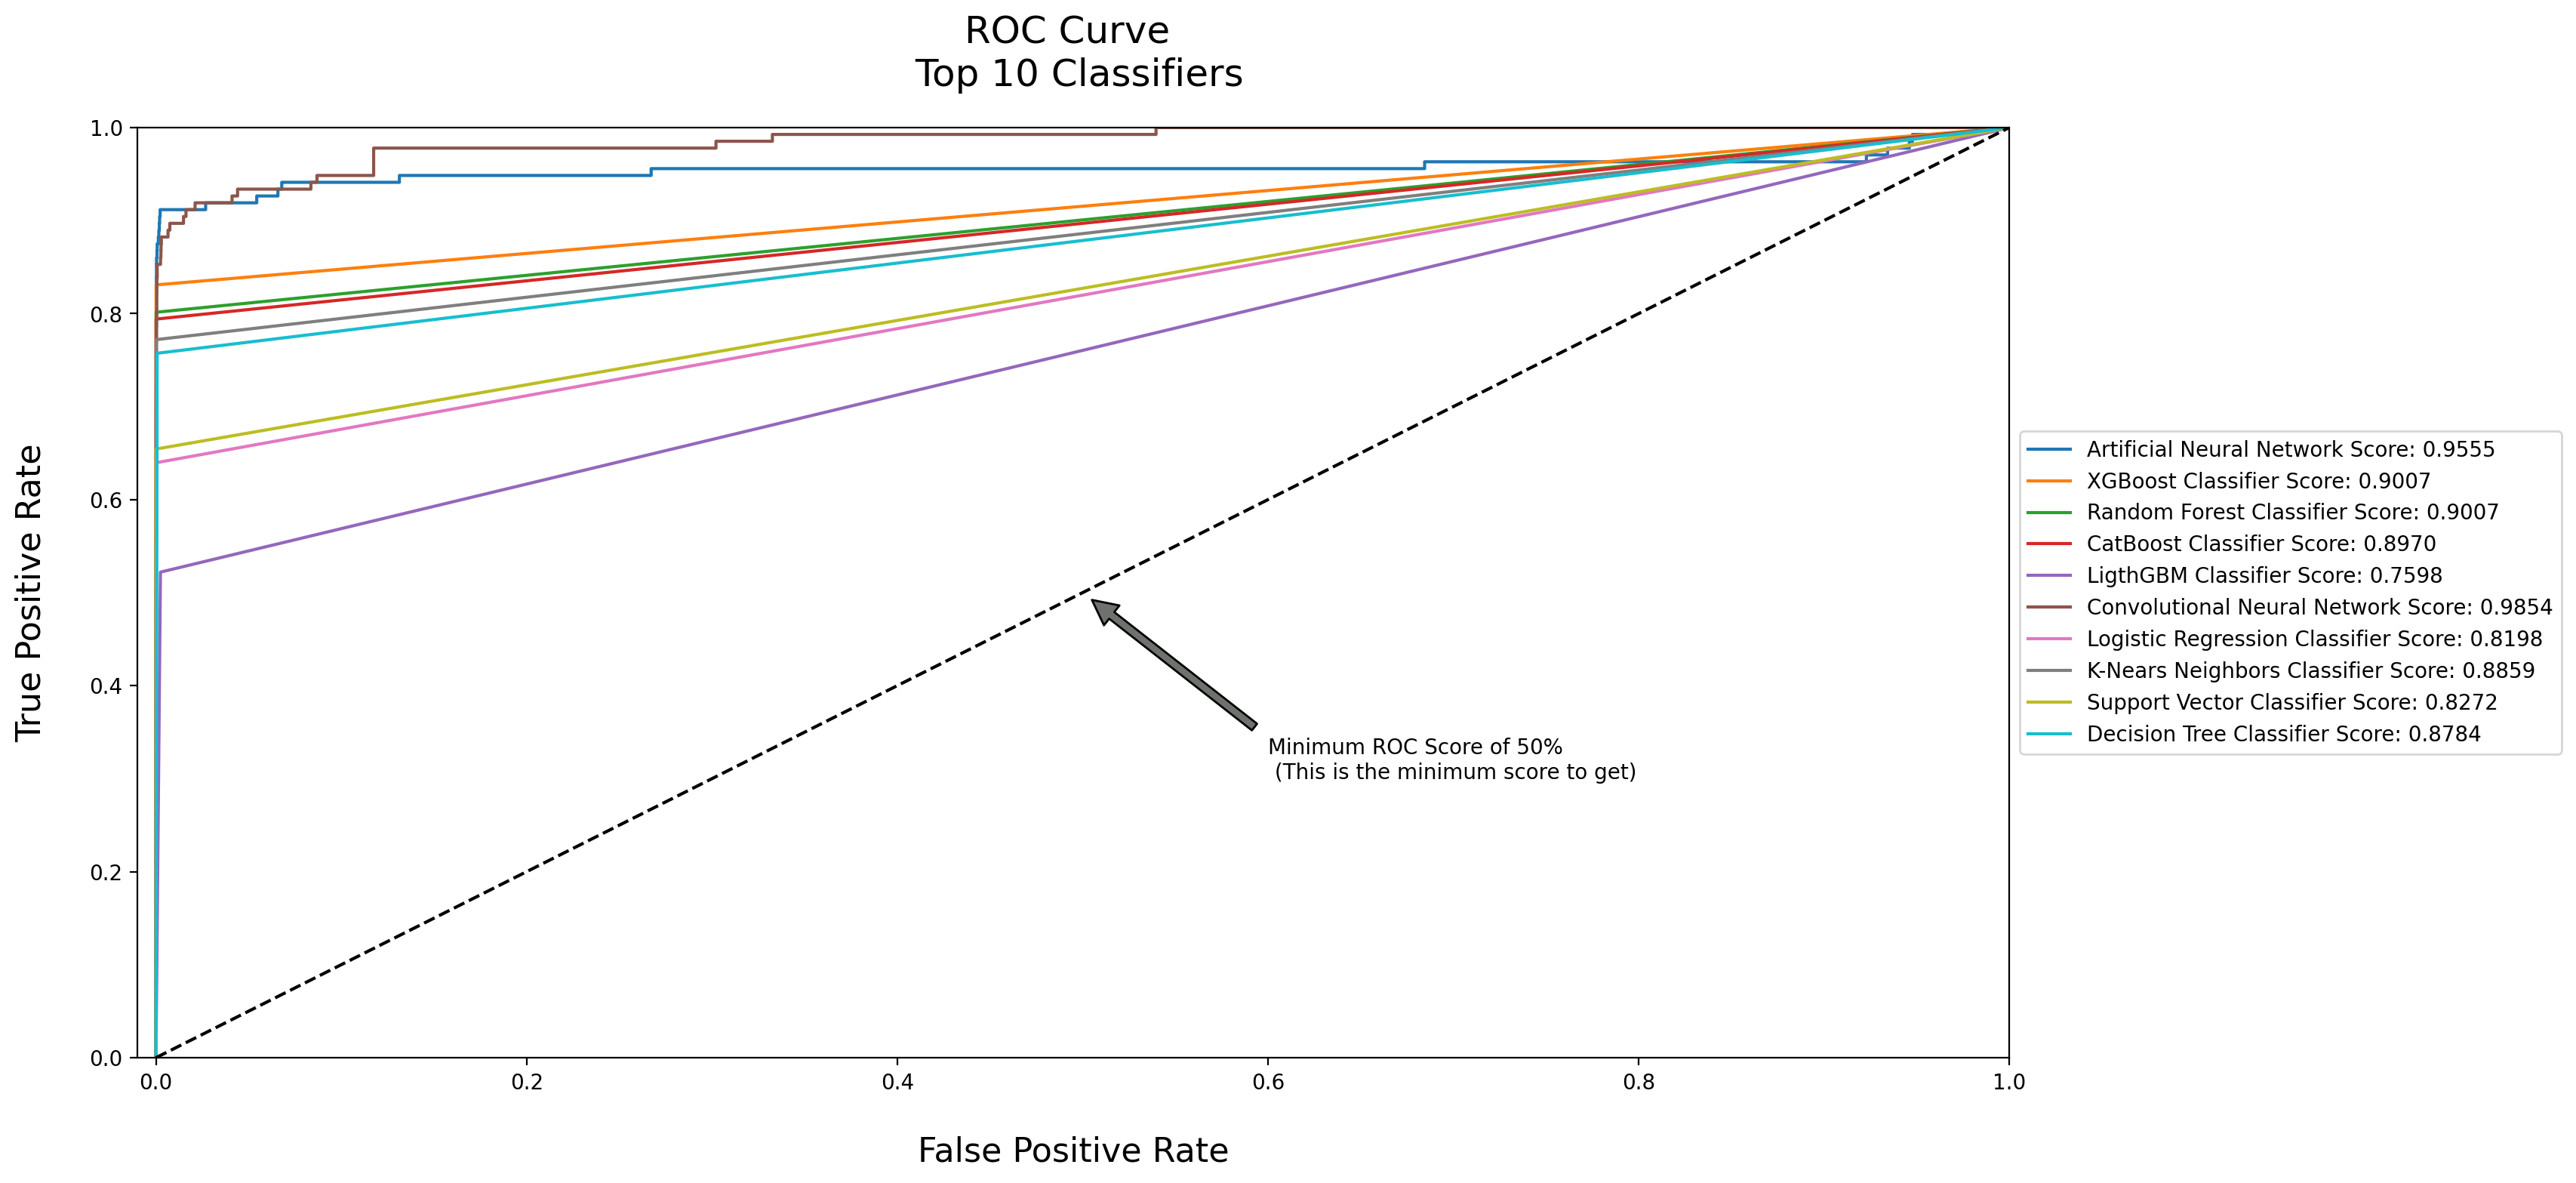

In [223]:
ANNs_fpr, ANNs_tpr, ANNs_threshold = roc_curve(y_test, y_test_pred_ANNs)
XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y_test, y_test_pred_XGB)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, y_test_pred_RF)
CatB_fpr, CatB_tpr, CatB_threshold = roc_curve(y_test, y_test_pred_CatB)
LGBM_fpr, LGBM_tpr, LGBM_threshold = roc_curve(y_test, y_test_pred_LGBM)
CNN_fpr, CNN_tpr, CNN_threshold = roc_curve(y_test, y_test_pred_CNN)
log_fpr, log_tpr, log_threshold = roc_curve(y_test, y_test_pred_log)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, y_test_pred_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_test_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_test_pred_tree)


def graph_roc_curve_multiple(ANNs_fpr, ANNs_tpr, 
                             XGBr_fpr, XGB_tpr, 
                             RF_fpr, RF_tpr, 
                             CatB_fpr, CatB_tpr, 
                             LGBM_fpr, LGBM_tpr, 
                             CNN_fpr, CNN_tpr,
                             log_fpr, log_tpr,
                             knn_fpr, knn_tpr,
                             svc_fpr, svc_tpr,
                             tree_fpr, tree_tpr) :
    plt.figure(figsize = (16, 8))
    plt.title('ROC Curve \n Top 10 Classifiers', fontsize = 18, pad = 20)
    plt.plot(ANNs_fpr, ANNs_tpr, label = 'Artificial Neural Network Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_ANNs)))
    plt.plot(XGB_fpr, XGB_tpr, label = 'XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_RF)))
    plt.plot(RF_fpr, RF_tpr, label = 'Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_RF)))
    plt.plot(CatB_fpr, CatB_tpr, label = 'CatBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_CatB)))
    plt.plot(LGBM_fpr, LGBM_tpr, label = 'LigthGBM Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_LGBM)))
    plt.plot(CNN_fpr, CNN_tpr, label = 'Convolutional Neural Network Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_CNN)))
    plt.plot(log_fpr, log_tpr, label = 'Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_log)))
    plt.plot(knn_fpr, knn_tpr, label = 'K-Nears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_knn)))
    plt.plot(svc_fpr, svc_tpr, label = 'Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_svc)))
    plt.plot(tree_fpr, tree_tpr, label = 'Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred_tree)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize = 16, labelpad = 20)
    plt.ylabel('True Positive Rate', fontsize = 16, labelpad = 20)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', 
                 xy = (0.5, 0.5), 
                 xytext = (0.6, 0.3), 
                 arrowprops = dict(facecolor = '#6E726D', shrink = 0.05))
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.style.use('default')
    plt.grid('')
    
graph_roc_curve_multiple(ANNs_fpr, ANNs_tpr, 
                         XGB_fpr, XGB_tpr, 
                         RF_fpr, RF_tpr, 
                         CatB_fpr, CatB_tpr, 
                         LGBM_fpr, LGBM_tpr, 
                         CNN_fpr, CNN_tpr,
                         log_fpr, log_tpr,
                         knn_fpr, knn_tpr,
                         svc_fpr, svc_tpr,
                         tree_fpr, tree_tpr)
plt.show()

In [119]:
roc_df = pd.DataFrame(data = 
                                {
                                  'False Positive Rate': ANNs_fpr, 
                                  'True Positive Rate': ANNs_tpr, 
                                  'Threshold': ANNs_threshold
                                }
)

roc_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.0,0.000000,2.0
1,0.0,0.205882,1.0
2,0.0,0.213235,1.0
3,0.0,0.235294,1.0
4,0.0,0.242647,1.0


# 17. Reference

- https://www.kaggle.com/code/faressayah/credit-card-fraud-detection-anns-vs-xgboost/comments
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#Test-Data-with-Logistic-Regression
- https://www.kaggle.com/code/krutarthhd/simple-credit-card-fraud-detection-95-accuracy#Reshaping-the-input-to-3D.
- https://blog.pjjop.org/evaluation-metrics-for-classification-model/
-
http://www.ninenox.com/2020/09/24/%E0%B8%97%E0%B8%B3%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B9%83%E0%B8%88-accuracyprecisionrecallf1-score/
- https://datascihaeng.medium.com/evaluation-matrix-part1-ad629e648f8